In [ ]:
!pip install h2o

In [ ]:
import h2o

In [ ]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,13 mins 41 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.42.0.2
H2O_cluster_version_age:,9 days
H2O_cluster_name:,H2O_from_python_unknownUser_hwofu0
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.153 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
from h2o.automl import H2OAutoML

In [ ]:
train = h2o.upload_file('/content/sample_data/response_soude__.csv')

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
test = h2o.upload_file('/content/sample_data/unseen test data_2.csv')

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
y = "Ave response time"
x = train.columns
x.remove(y)

In [ ]:
y_test = "Ave response time"
x_test = test.columns
x_test.remove(y_test)

In [ ]:
am1 = H2OAutoML(max_models=10, exclude_algos=['StackedEnsemble'],seed = 1234, verbosity='info', nfolds=10)

In [ ]:
am1.train(x = x, y = y, training_frame = train, validation_frame=test)

AutoML progress: |
16:06:49.83: Project: AutoML_2_20230803_160649
16:06:49.83: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.
16:06:49.83: Setting stopping tolerance adaptively based on the training frame: 0.013689641954834839
16:06:49.84: Build control seed: 1234
16:06:49.84: training frame: Frame key: AutoML_2_20230803_160649_training_Key_Frame__upload_8c79e8ccbb024dca5db27ee4dfd64351.hex    cols: 12    rows: 5336  chunks: 1    size: 113868  checksum: 5311639713264652400
16:06:49.84: validation frame: Frame key: Key_Frame__upload_be647e6df76f517edde03da4a5754b6c.hex    cols: 12    rows: 1037  chunks: 1    size: 18191  checksum: -8781524109905920851
16:06:49.84: leaderboard frame: NULL
16:06:49.84: blending frame: NULL
16:06:49.84: response column: Ave response time
16:06:49.84

Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_3_AutoML_2_20230803_160649


Model Summary: 
    number_of_trees
--  -----------------
    51

ModelMetricsRegression: xgboost
** Reported on train data. **

MSE: 491.5954682015017
RMSE: 22.171952286650395
MAE: 6.799622744746294
RMSLE: NaN
Mean Residual Deviance: 491.5954682015017

ModelMetricsRegression: xgboost
** Reported on validation data. **

MSE: 1670.4150029586363
RMSE: 40.870710820325066
MAE: 21.406044923236077
RMSLE: 0.4223688272513234
Mean Residual Deviance: 1670.4150029586363

ModelMetricsRegression: xgboost
** Reported on cross-validation data. **

MSE: 492.7522126197603
RMSE: 22.19802271869637
MAE: 6.840906070703096
RMSLE: NaN
Mean Residual Deviance: 492.7522126197603

Cross-Validation Metrics Summary: 
                        mean      sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid    cv_6_valid    cv_7_valid    cv_8_valid    cv_9_valid    cv_10_valid
----------------------  --------  ----------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  -------------
mae                     6.84091   0.159535    6.76243       7.02014       6.78317       6.83757       6.5111        7.08312       6.88649       6.77172       6.9494        6.80401
mean_residual_deviance  492.759   28.2882     491.345       497.208       486.748       492.082       424.252       527.956       526.674       487.998       498.688       494.641
mse                     492.759   28.2882     491.345       497.208       486.748       492.082       424.252       527.956       526.674       487.998       498.688       494.641
r2                      0.976571  0.00133583  0.976521      0.977063      0.97766       0.976524      0.979544      0.974592      0.975775      0.975737      0.975842      0.976455
residual_deviance       492.759   28.2882     491.345       497.208       486.748       492.082       424.252       527.956       526.674       487.998       498.688       494.641
rmse                    22.1896   0.649267    22.1663       22.2982       22.0624       22.1829       20.5974       22.9773       22.9494       22.0907       22.3313       22.2405
rmsle                   nan       0           nan           nan           nan           nan           nan           nan           nan           nan           nan           nan

Scoring History: 
    timestamp            duration    number_of_trees    training_rmse    training_mae    training_deviance    validation_rmse    validation_mae    validation_deviance
--  -------------------  ----------  -----------------  ---------------  --------------  -------------------  -----------------  ----------------  ---------------------
    2023-08-03 16:08:52  5.190 sec   0                  172.415          93.21           29726.8              128.937            74.3256           16624.7
    2023-08-03 16:08:52  5.266 sec   5                  50.6346          24.2576         2563.86              59.9624            28.5321           3595.49
    2023-08-03 16:08:52  5.302 sec   10                 27.386           11.3233         749.994              46.5708            22.3485           2168.84
    2023-08-03 16:08:52  5.337 sec   15                 23.7604          9.00853         564.557              44.7868            23.1435           2005.85
    2023-08-03 16:08:52  5.374 sec   20                 22.5848          7.84101         510.075              43.4736            22.7802           1889.95
    2023-08-03 16:08:52  5.431 sec   25                 22.3478          7.40542         499.424              40.9562            21.4475           1677.41
    2023-08-03 16:08:52  5.475 sec   30                 22.2429          7.10871         494.747              40.9319            21.389            1675.42
    2023-08-03 16:08:52  5.516 sec   35                 22.2129          7.05079         493.413              40.722             

In [ ]:
lb = am1.leaderboard

In [ ]:
lb

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
XGBoost_3_AutoML_2_20230803_160649,22.198,492.752,6.84091,nan,492.752
XGBoost_2_AutoML_2_20230803_160649,22.2177,493.626,6.71985,0.154785,493.626
XGBoost_1_AutoML_2_20230803_160649,22.3681,500.331,6.95718,nan,500.331
GBM_2_AutoML_2_20230803_160649,22.5611,509.001,7.07949,nan,509.001
GBM_3_AutoML_2_20230803_160649,22.5745,509.608,7.04403,0.146707,509.608
GBM_4_AutoML_2_20230803_160649,22.6215,511.733,7.04296,0.148025,511.733
GBM_1_AutoML_2_20230803_160649,28.356,804.063,11.7865,nan,804.063
DRF_1_AutoML_2_20230803_160649,32.2172,1037.95,14.7323,0.67394,1037.95
XRT_1_AutoML_2_20230803_160649,37.542,1409.4,18.0299,0.750688,1409.4
GLM_1_AutoML_2_20230803_160649,101.519,10306,71.2575,nan,10306


In [ ]:
dataset_pred=am1.leader.predict(test)

xgboost prediction progress: |███████████████████████████████████████████████████| (done) 100%


In [ ]:
am1.leader.model_performance(test)

ModelMetricsRegression: xgboost
** Reported on test data. **

MSE: 1670.4150029586363
RMSE: 40.870710820325066
MAE: 21.406044923236077
RMSLE: 0.4223688272513234
Mean Residual Deviance: 1670.4150029586363

In [ ]:
best_model = am1.leader

In [ ]:
predictions = best_model.predict(test)
r2_score = best_model.r2()
print("R2 Score:", r2_score)

xgboost prediction progress: |███████████████████████████████████████████████████| (done) 100%
R2 Score: 0.9766337648183709


In [ ]:
model_ids = list(am1.leaderboard['model_id'].as_data_frame().iloc[:,0])

In [ ]:
model_ids

['XGBoost_3_AutoML_2_20230803_160649',
 'XGBoost_2_AutoML_2_20230803_160649',
 'XGBoost_1_AutoML_2_20230803_160649',
 'GBM_2_AutoML_2_20230803_160649',
 'GBM_3_AutoML_2_20230803_160649',
 'GBM_4_AutoML_2_20230803_160649',
 'GBM_1_AutoML_2_20230803_160649',
 'DRF_1_AutoML_2_20230803_160649',
 'XRT_1_AutoML_2_20230803_160649',
 'GLM_1_AutoML_2_20230803_160649']

In [ ]:
h2o.get_model([mid for mid in model_ids if "XGB" in mid][0])

Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_3_AutoML_2_20230803_160649


Model Summary: 
    number_of_trees
--  -----------------
    51

ModelMetricsRegression: xgboost
** Reported on train data. **

MSE: 491.5954682015017
RMSE: 22.171952286650395
MAE: 6.799622744746294
RMSLE: NaN
Mean Residual Deviance: 491.5954682015017

ModelMetricsRegression: xgboost
** Reported on validation data. **

MSE: 1670.4150029586363
RMSE: 40.870710820325066
MAE: 21.406044923236077
RMSLE: 0.4223688272513234
Mean Residual Deviance: 1670.4150029586363

ModelMetricsRegression: xgboost
** Reported on cross-validation data. **

MSE: 492.7522126197603
RMSE: 22.19802271869637
MAE: 6.840906070703096
RMSLE: NaN
Mean Residual Deviance: 492.7522126197603

Cross-Validation Metrics Summary: 
                        mean      sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid    cv_6_valid    cv_7_valid    cv_8_valid    cv_9_valid    cv_10_valid
----------------------  --------  ----------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  -------------
mae                     6.84091   0.159535    6.76243       7.02014       6.78317       6.83757       6.5111        7.08312       6.88649       6.77172       6.9494        6.80401
mean_residual_deviance  492.759   28.2882     491.345       497.208       486.748       492.082       424.252       527.956       526.674       487.998       498.688       494.641
mse                     492.759   28.2882     491.345       497.208       486.748       492.082       424.252       527.956       526.674       487.998       498.688       494.641
r2                      0.976571  0.00133583  0.976521      0.977063      0.97766       0.976524      0.979544      0.974592      0.975775      0.975737      0.975842      0.976455
residual_deviance       492.759   28.2882     491.345       497.208       486.748       492.082       424.252       527.956       526.674       487.998       498.688       494.641
rmse                    22.1896   0.649267    22.1663       22.2982       22.0624       22.1829       20.5974       22.9773       22.9494       22.0907       22.3313       22.2405
rmsle                   nan       0           nan           nan           nan           nan           nan           nan           nan           nan           nan           nan

Scoring History: 
    timestamp            duration    number_of_trees    training_rmse    training_mae    training_deviance    validation_rmse    validation_mae    validation_deviance
--  -------------------  ----------  -----------------  ---------------  --------------  -------------------  -----------------  ----------------  ---------------------
    2023-08-03 16:08:52  5.190 sec   0                  172.415          93.21           29726.8              128.937            74.3256           16624.7
    2023-08-03 16:08:52  5.266 sec   5                  50.6346          24.2576         2563.86              59.9624            28.5321           3595.49
    2023-08-03 16:08:52  5.302 sec   10                 27.386           11.3233         749.994              46.5708            22.3485           2168.84
    2023-08-03 16:08:52  5.337 sec   15                 23.7604          9.00853         564.557              44.7868            23.1435           2005.85
    2023-08-03 16:08:52  5.374 sec   20                 22.5848          7.84101         510.075              43.4736            22.7802           1889.95
    2023-08-03 16:08:52  5.431 sec   25                 22.3478          7.40542         499.424              40.9562            21.4475           1677.41
    2023-08-03 16:08:52  5.475 sec   30                 22.2429          7.10871         494.747              40.9319            21.389            1675.42
    2023-08-03 16:08:52  5.516 sec   35                 22.2129          7.05079         493.413              40.722             

In [ ]:
out = h2o.get_model([mid for mid in model_ids if "GBM" in mid][0])

In [ ]:
out.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'GBM_2_AutoML_2_20230803_160649',
   'type': 'Key<Model>',
   'URL': '/3/Models/GBM_2_AutoML_2_20230803_160649'},
  'input': None},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'AutoML_2_20230803_160649_training_Key_Frame__upload_8c79e8ccbb024dca5db27ee4dfd64351.hex',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/AutoML_2_20230803_160649_training_Key_Frame__upload_8c79e8ccbb024dca5db27ee4dfd64351.hex'},
  'input': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'AutoML_2_20230803_160649_training_Key_Frame__upload_8c79e8ccbb024dca5db27ee4dfd64351.hex',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/AutoML_2_20230803_160649_training_Key_Frame__upload_8c79e8ccbb02

In [ ]:
out

Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_2_AutoML_2_20230803_160649


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    129                129                         60843                  6            7            6.9845        11            50            32.7674

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 499.6694861767875
RMSE: 22.35328803949852
MAE: 6.935858003381846
RMSLE: NaN
Mean Residual Deviance: 499.6694861767875

ModelMetricsRegression: gbm
** Reported on validation data. **

MSE: 1421.205007572795
RMSE: 37.69887276262773
MAE: 16.80290892187573
RMSLE: 0.21574223055472355
Mean Residual Deviance: 1421.205007572795

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 509.00145873508717
RMSE: 22.56106067398178
MAE: 7.079491062582854
RMSLE: NaN
Mean Residual Deviance: 509.00145873508717

Cross-Validation Metrics Summary: 
                        mean      sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid    cv_6_valid    cv_7_valid    cv_8_valid    cv_9_valid    cv_10_valid
----------------------  --------  ----------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  -------------
mae                     7.07952   0.184271    6.96817       7.15114       6.99955       7.07592       6.70146       7.40838       7.1892        7.18033       7.12252       6.99857
mean_residual_deviance  509.006   30.5849     510.427       516.536       505.276       508.122       435.912       551.263       540.837       496.051       514.691       510.947
mse                     509.006   30.5849     510.427       516.536       505.276       508.122       435.912       551.263       540.837       496.051       514.691       510.947
r2                      0.975801  0.00141298  0.975609      0.976171      0.97681       0.975759      0.978981      0.97347       0.975124      0.975336      0.975067      0.975679
residual_deviance       509.006   30.5849     510.427       516.536       505.276       508.122       435.912       551.263       540.837       496.051       514.691       510.947
rmse                    22.5517   0.690612    22.5926       22.7274       22.4784       22.5416       20.8785       23.479        23.2559       22.2722       22.6868       22.6041
rmsle                   0.243085  0           nan           nan           0.243085      nan           nan           nan           nan           nan           nan           nan

Scoring History: 
     timestamp            duration    number_of_trees    training_rmse       training_mae        training_deviance    validation_rmse     validation_mae      validation_deviance
---  -------------------  ----------  -----------------  ------------------  ------------------  -------------------  ------------------  ------------------  ---------------------
     2023-08-03 16:08:09  14.700 sec  0.0                145.0472714657195   92.43699922511924   21038.71095965012    107.03754638785891  70.15294566742469   11457.036336733048
     2023-08-03 16:08:09  14.759 sec  5.0                91.42768115392528   57.005227007440986  8359.020881183824    77.08939652325826   47.47125327660937   5942.775056320142
     2023-08-03 16:08:09  14.823 sec  10.0               63.328061353039594  38.81134712500595   4010.4433547343474   63.351145318537355  35.43470309554994   4013.3676131704374
     2023-08-03 16:08:09  14.868 sec  15.0               45.88898290391228   27.27560138131591   2105.7987519555536   57.07960248442576   28.85889609598377   3258.081019780064
     2023-08-03 16:08:10  14.911 sec  20.0               35.296777

In [ ]:
out_gbm = h2o.get_model([mid for mid in model_ids if "GBM" in mid][0])

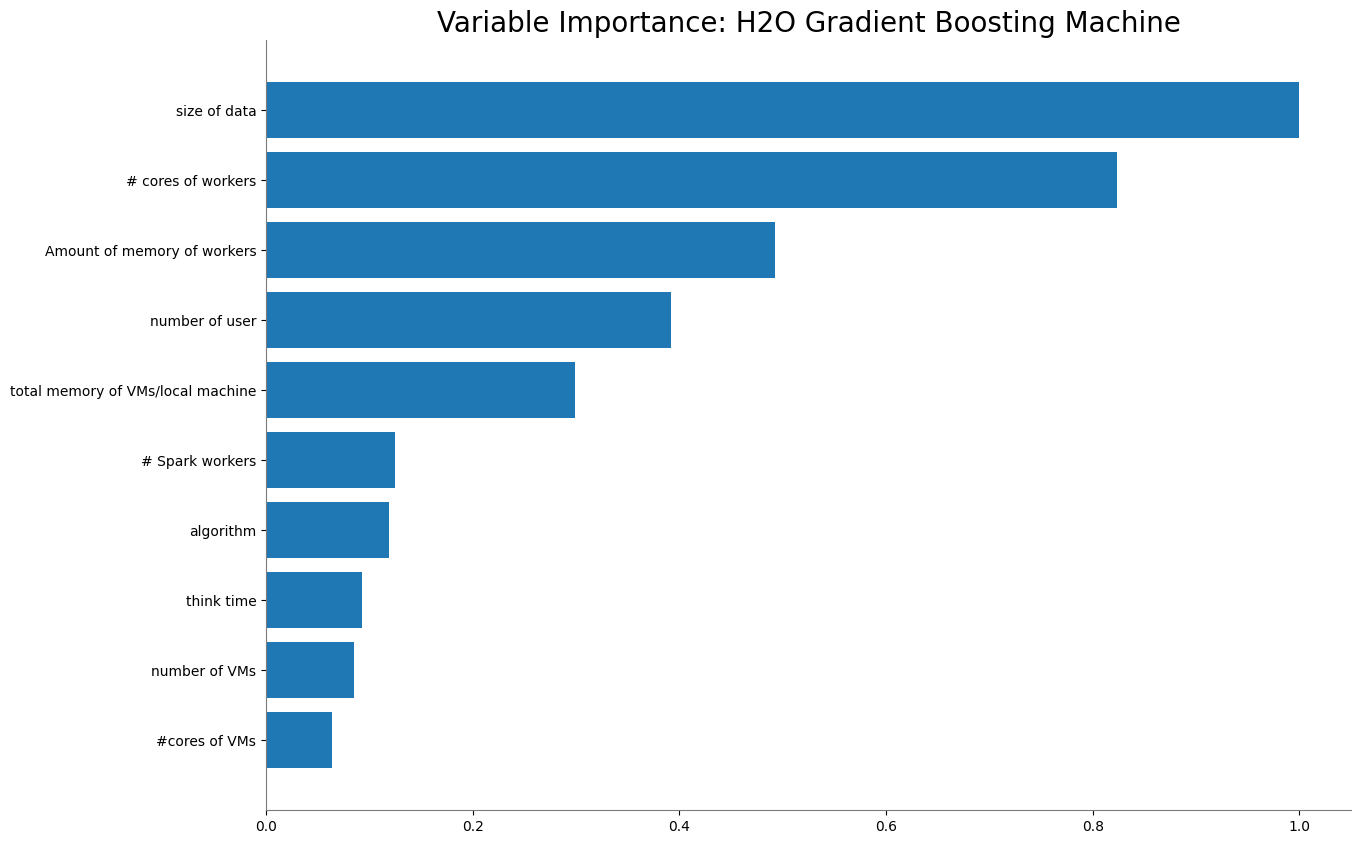

<Figure size 640x480 with 0 Axes>

In [ ]:
g=out.varimp_plot()

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,rmse,mse,mae,rmsle,mean_residual_deviance,training_time_ms,predict_time_per_row_ms,algo
XGBoost_3_AutoML_2_20230803_160649,22.172,491.595,6.79962,nan,491.595,514,0.001959,XGBoost
XGBoost_2_AutoML_2_20230803_160649,22.1724,491.617,6.67783,0.133874,491.617,536,0.003254,XGBoost
GBM_2_AutoML_2_20230803_160649,22.3533,499.669,6.93586,nan,499.669,1227,0.027141,GBM
GBM_4_AutoML_2_20230803_160649,22.3662,500.249,6.90963,0.13933,500.249,1350,0.040912,GBM
XGBoost_1_AutoML_2_20230803_160649,22.3746,500.621,6.97833,0.156165,500.621,840,0.003496,XGBoost
GBM_3_AutoML_2_20230803_160649,22.428,503.017,6.9577,0.151279,503.017,1170,0.051324,GBM
GBM_1_AutoML_2_20230803_160649,27.5844,760.897,11.0947,nan,760.897,3522,0.098974,GBM
DRF_1_AutoML_2_20230803_160649,32.4254,1051.4,14.8146,0.679901,1051.4,435,0.015335,DRF
XRT_1_AutoML_2_20230803_160649,37.9083,1437.04,17.98,0.757652,1437.04,554,0.01036,DRF
GLM_1_AutoML_2_20230803_160649,101.323,10266.3,71.1159,nan,10266.3,66,0.000904,GLM


# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

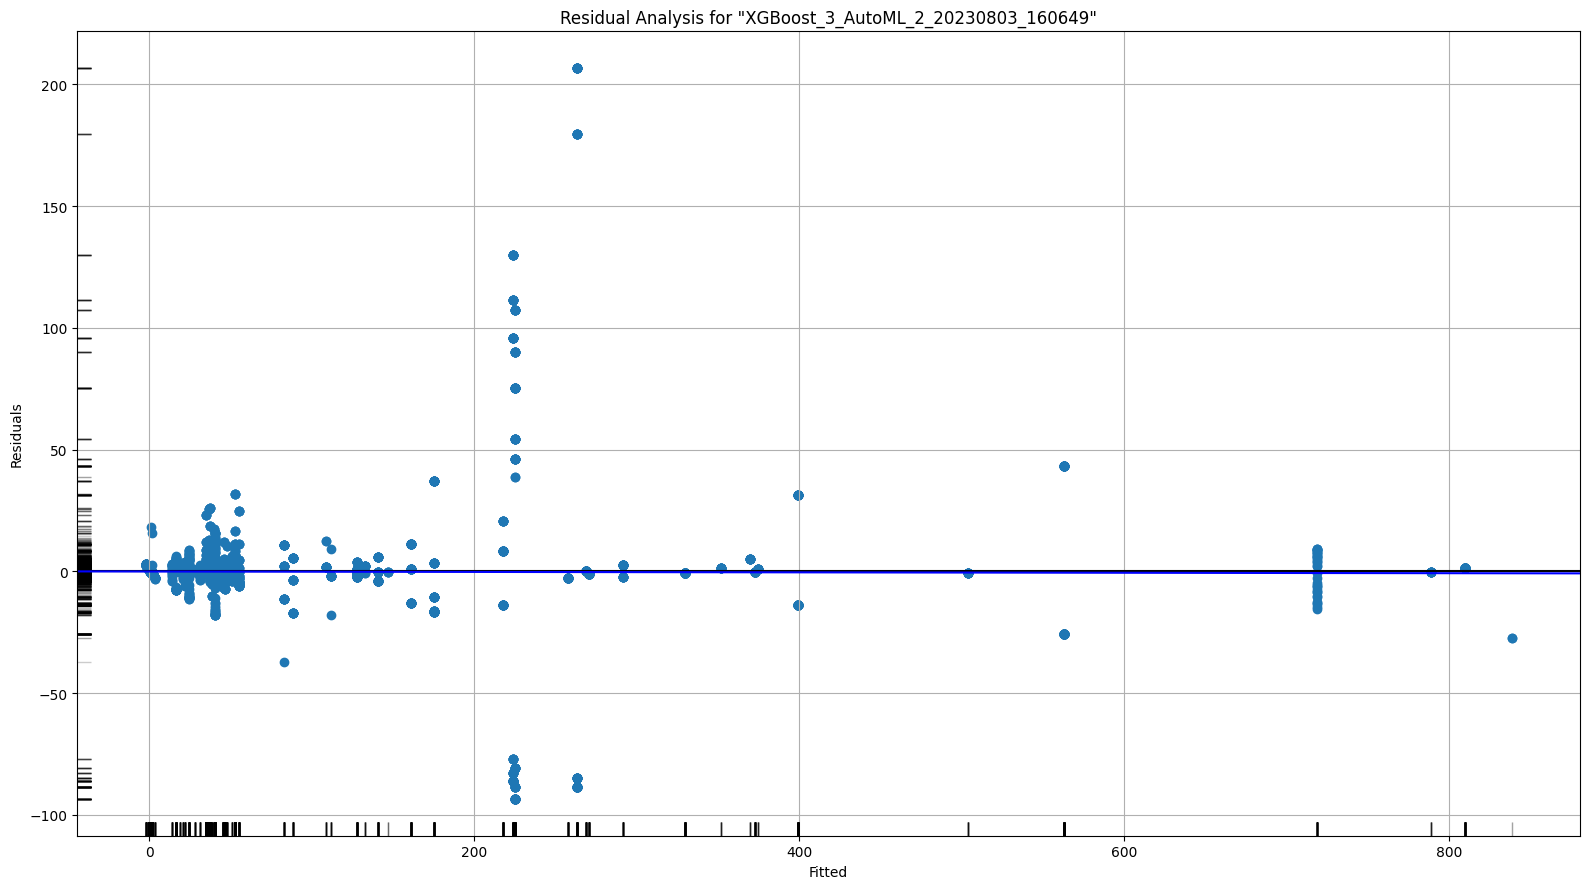

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

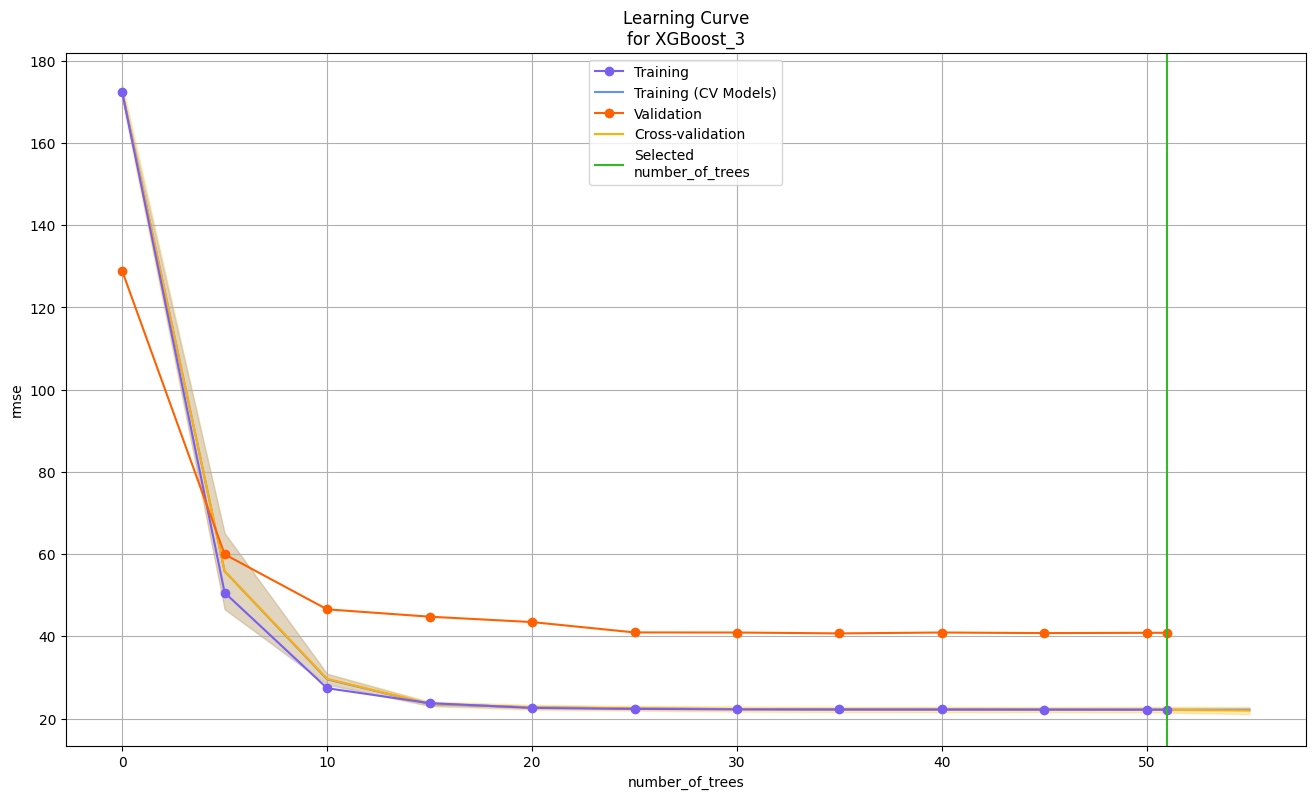

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

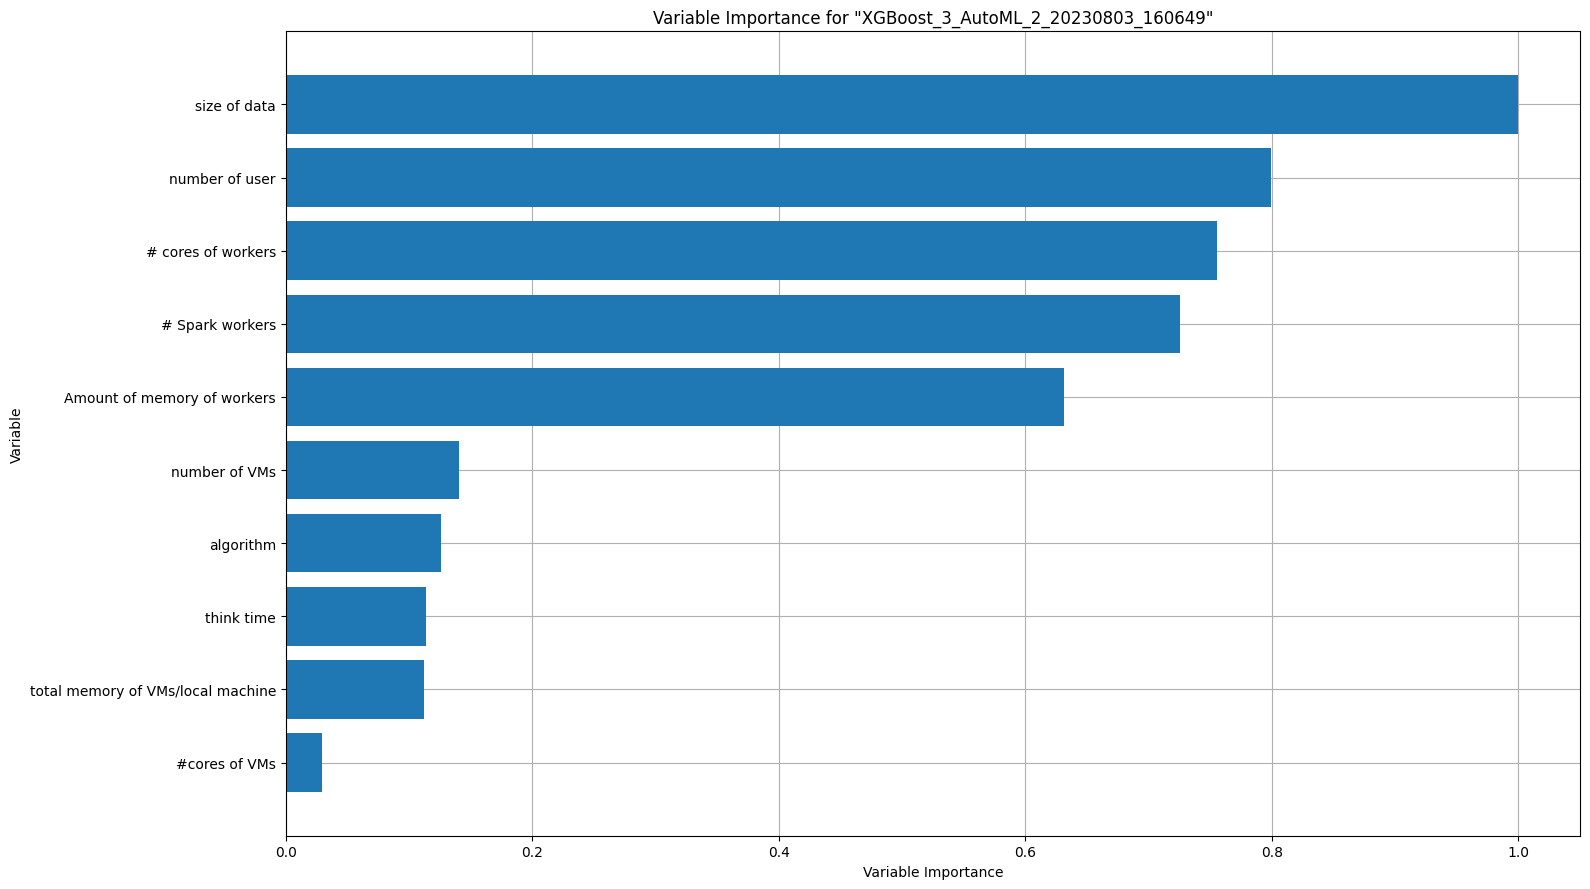

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

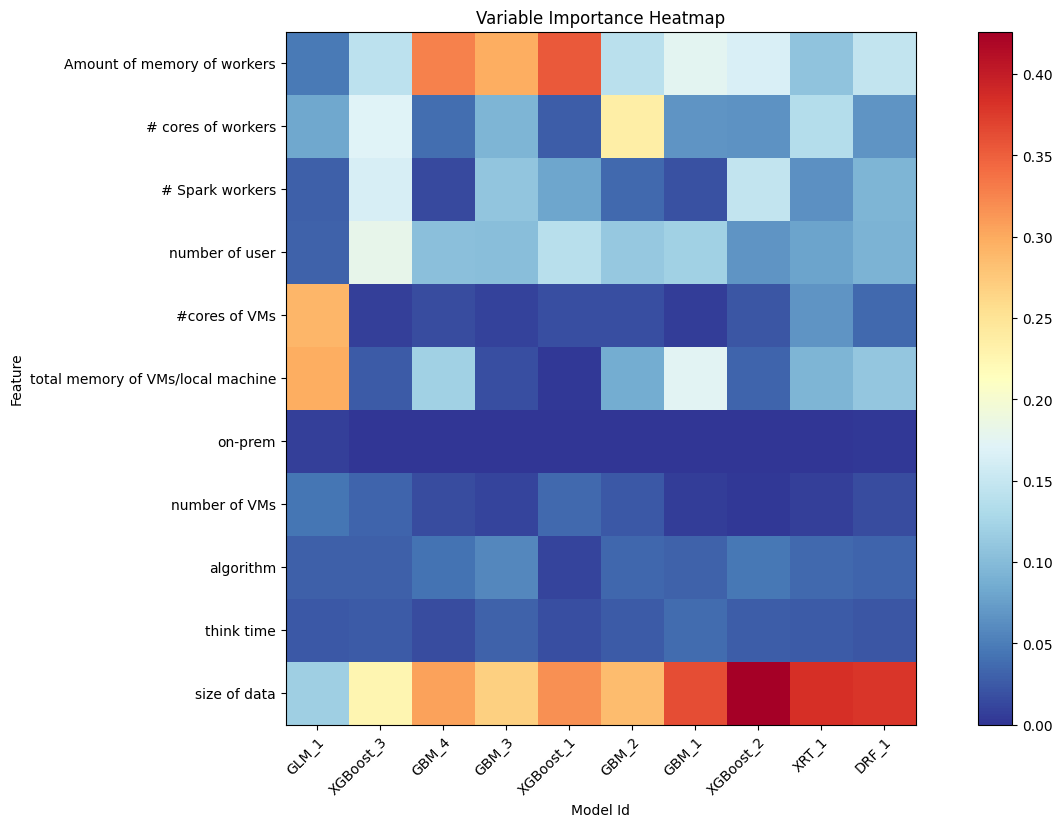

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

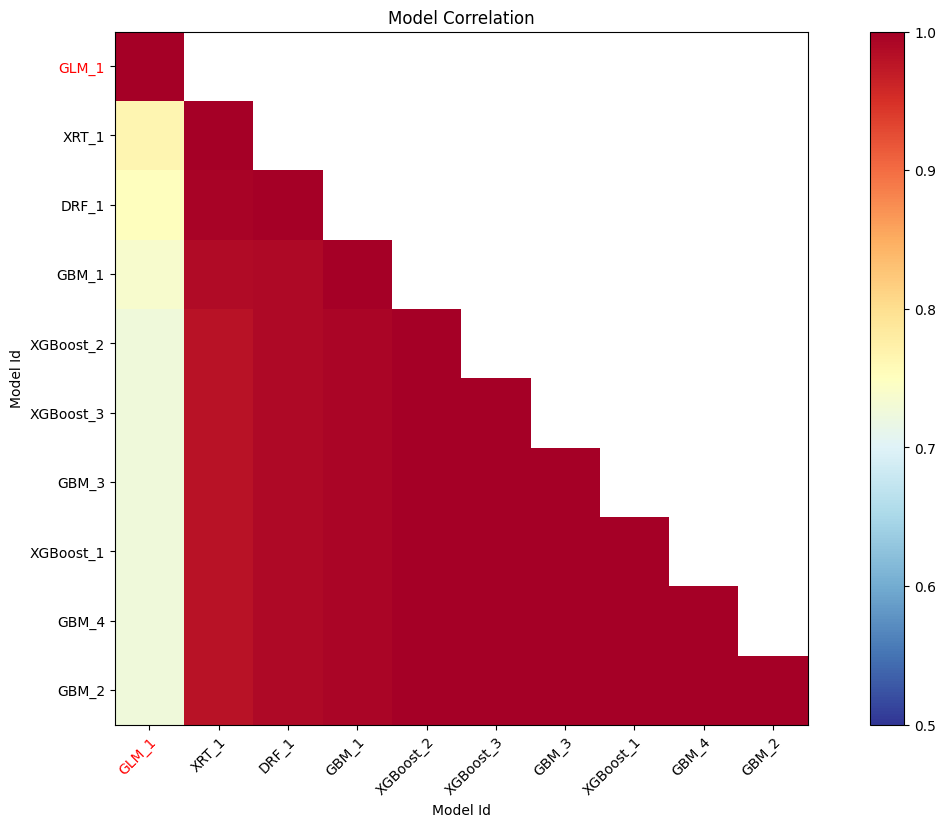

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

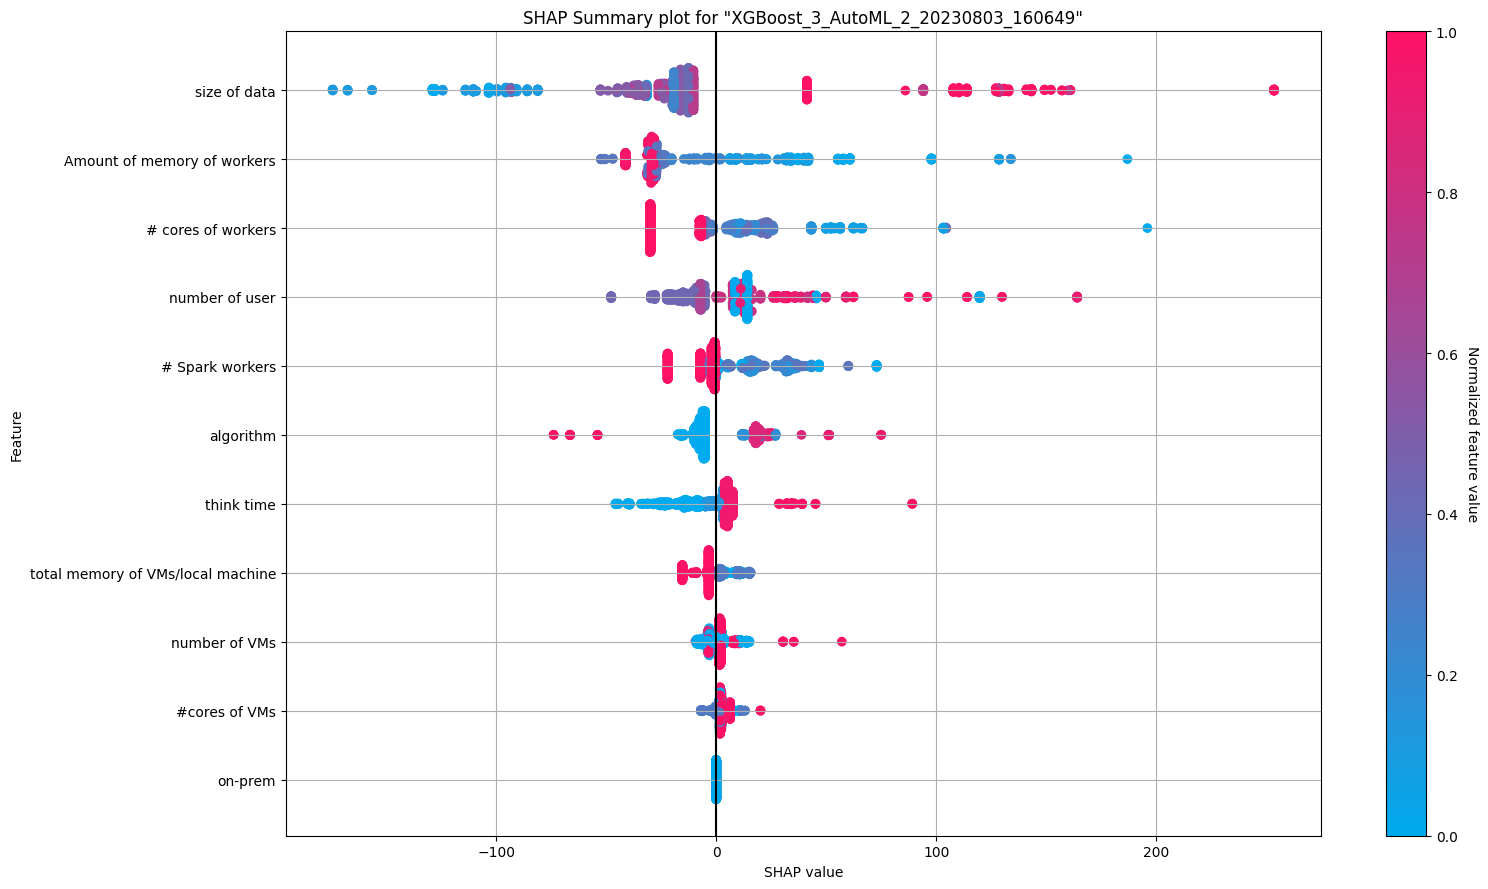

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

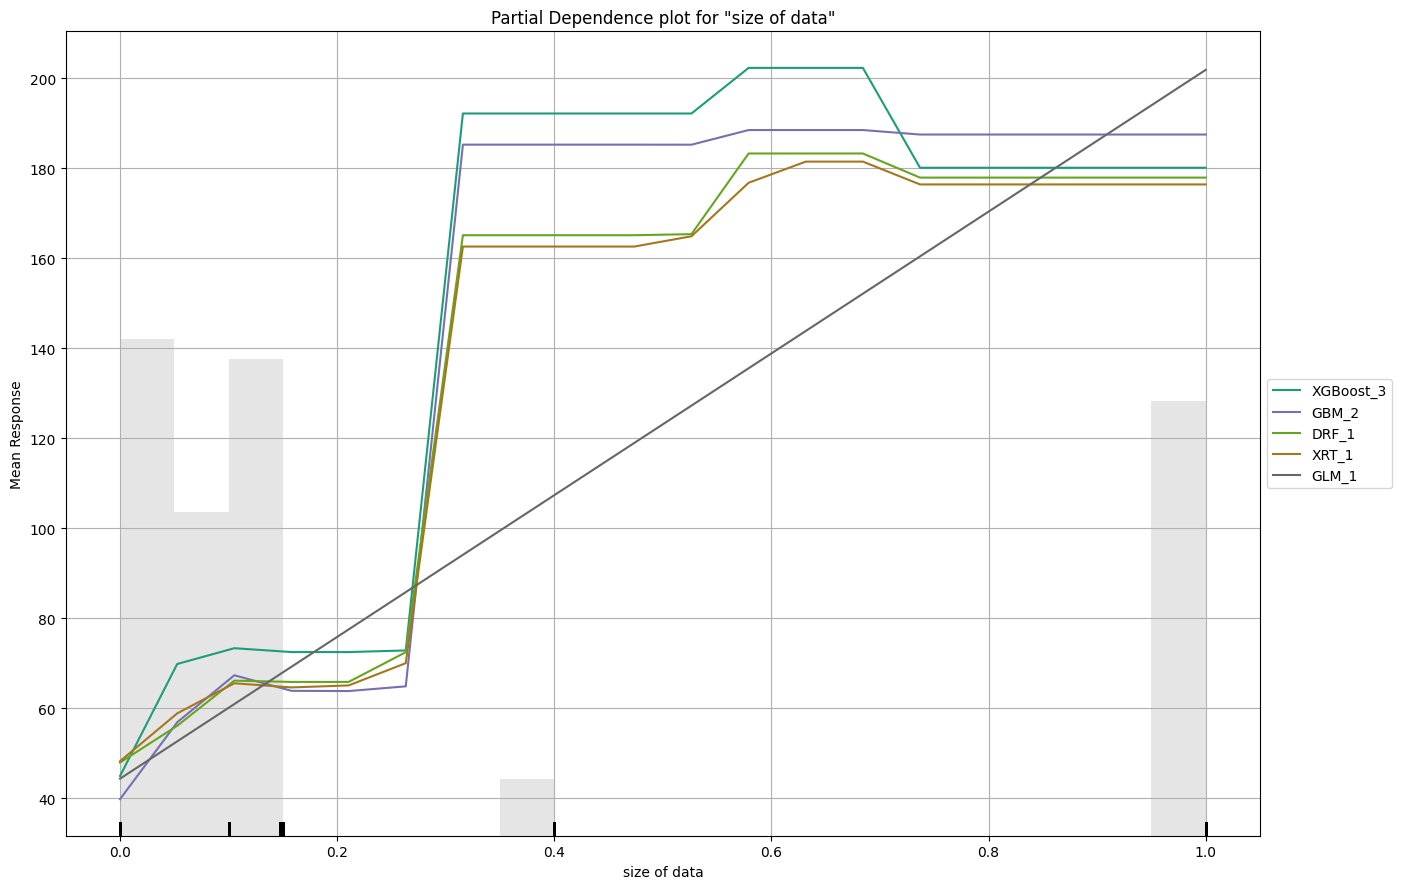

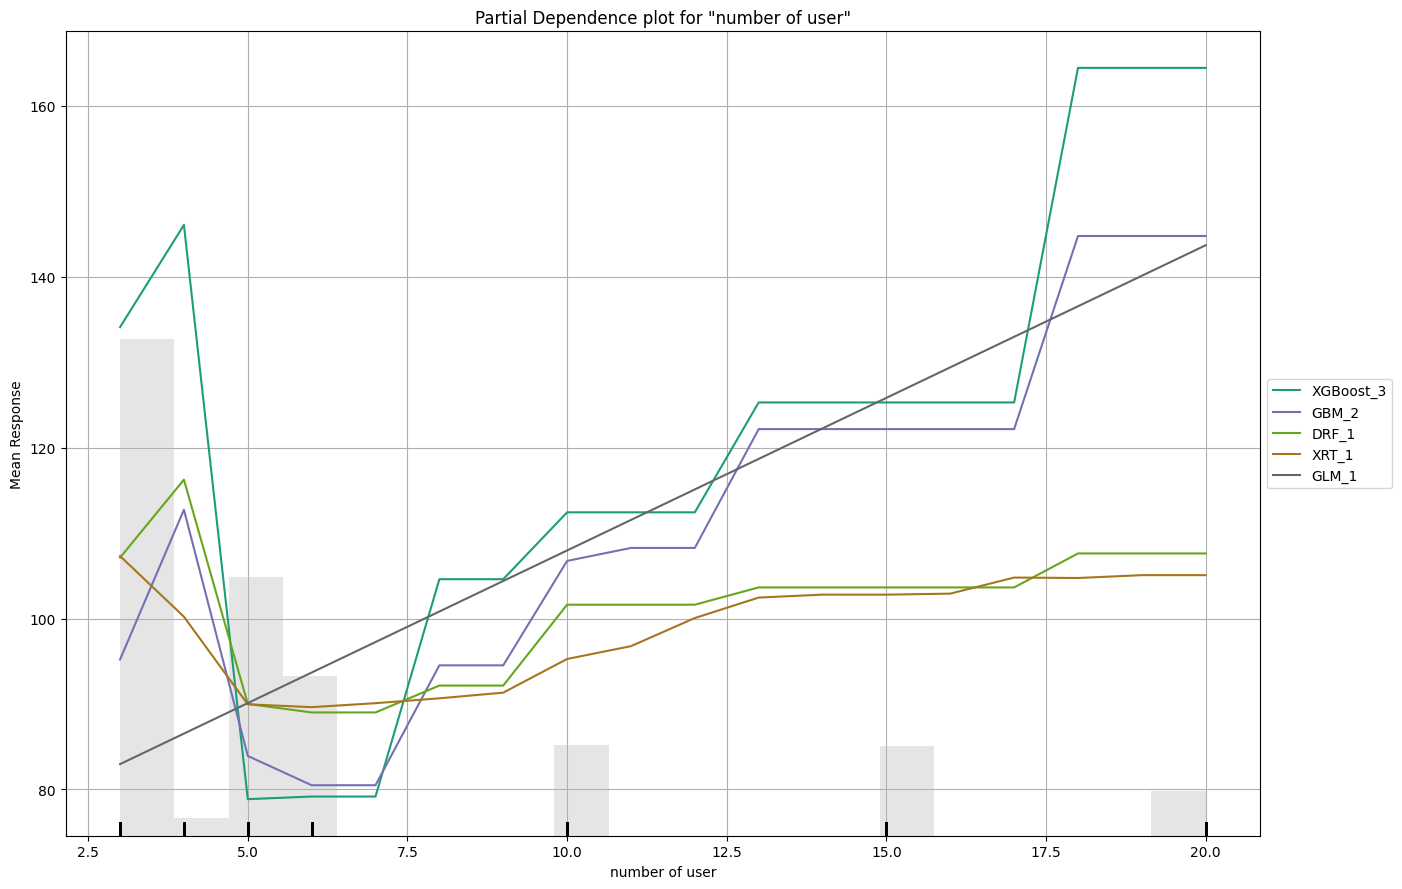

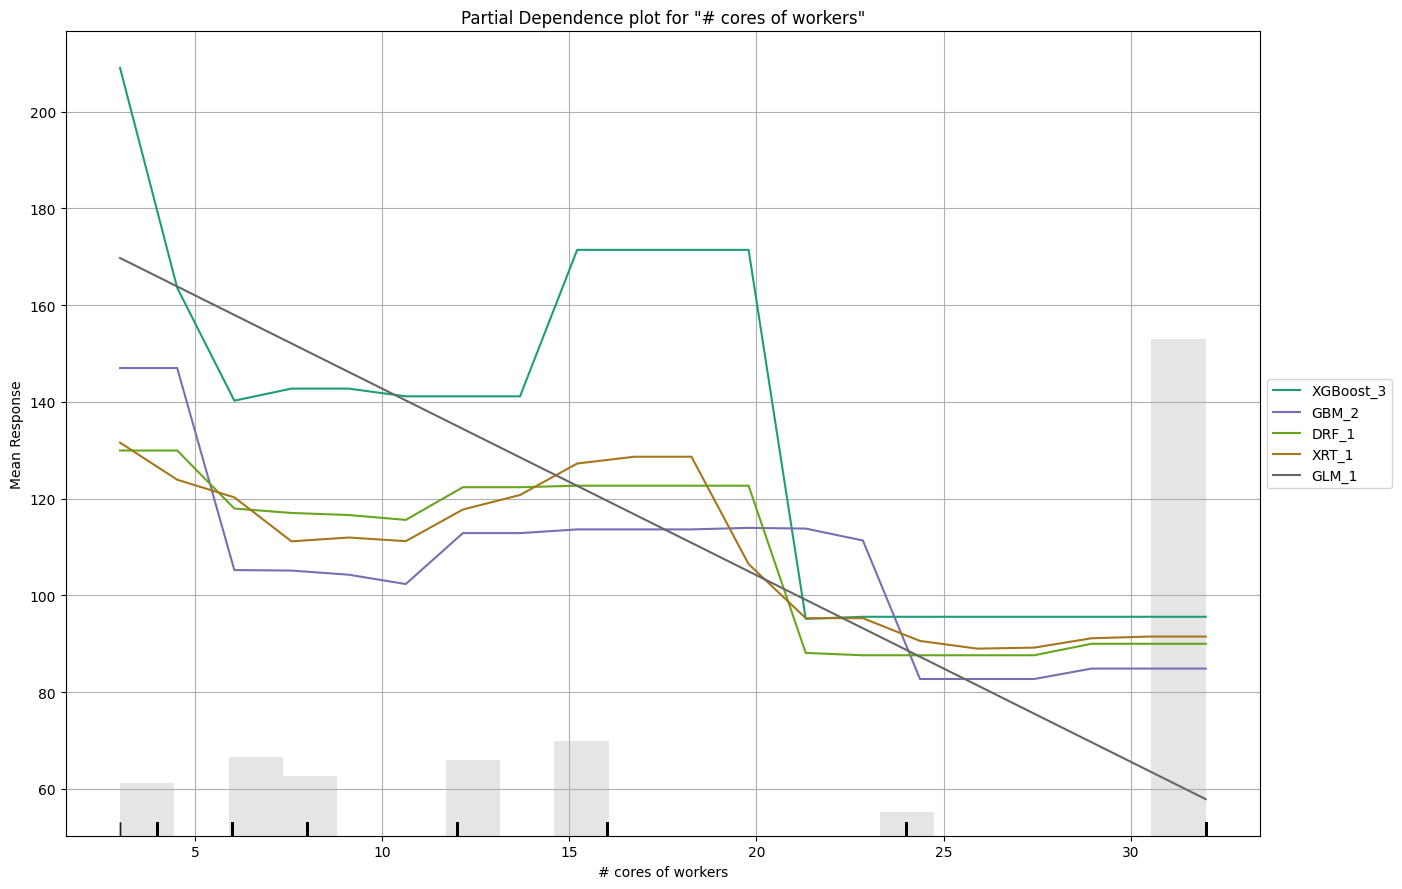

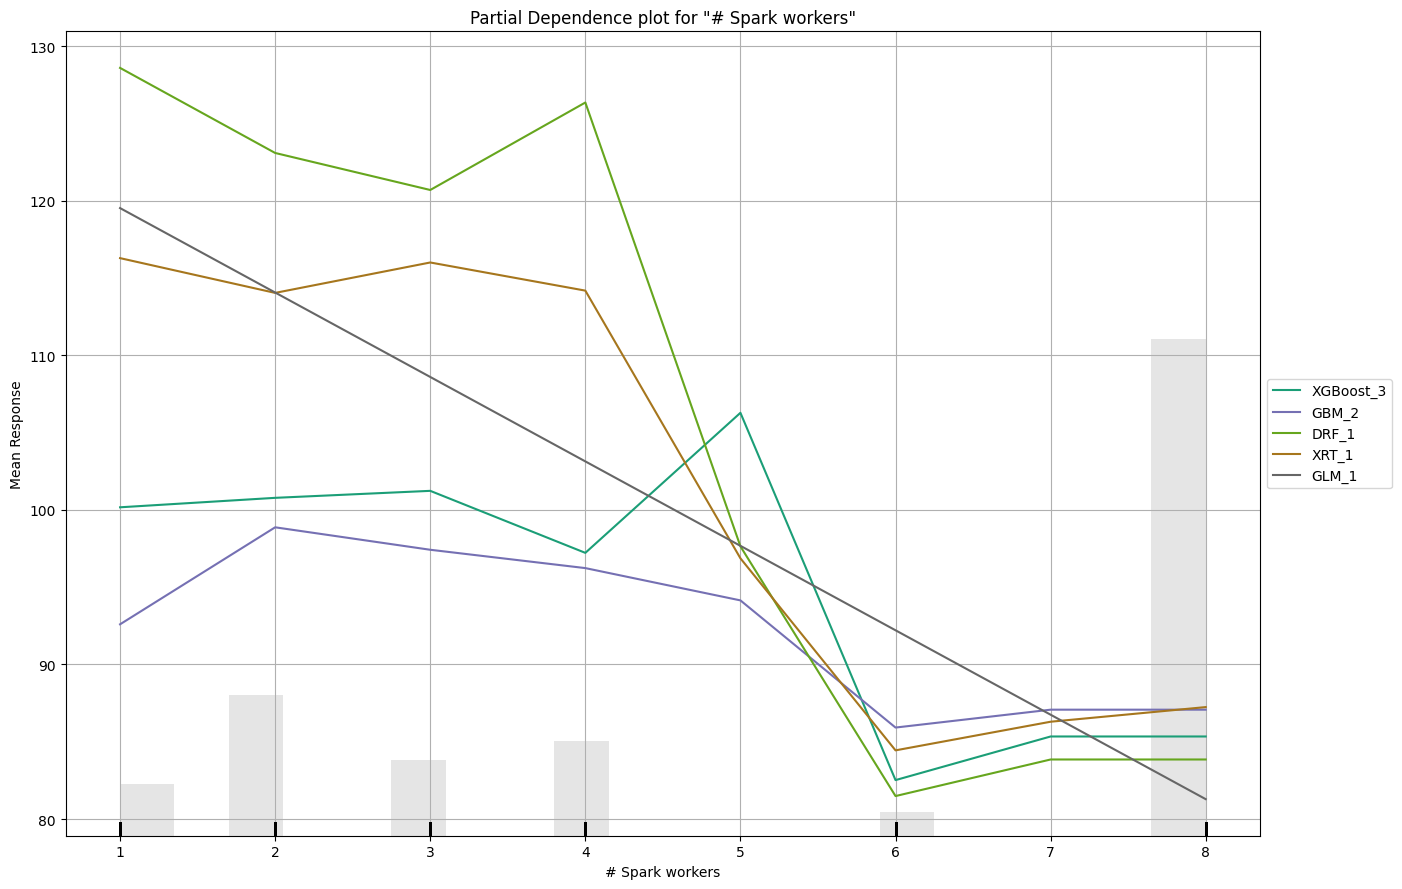

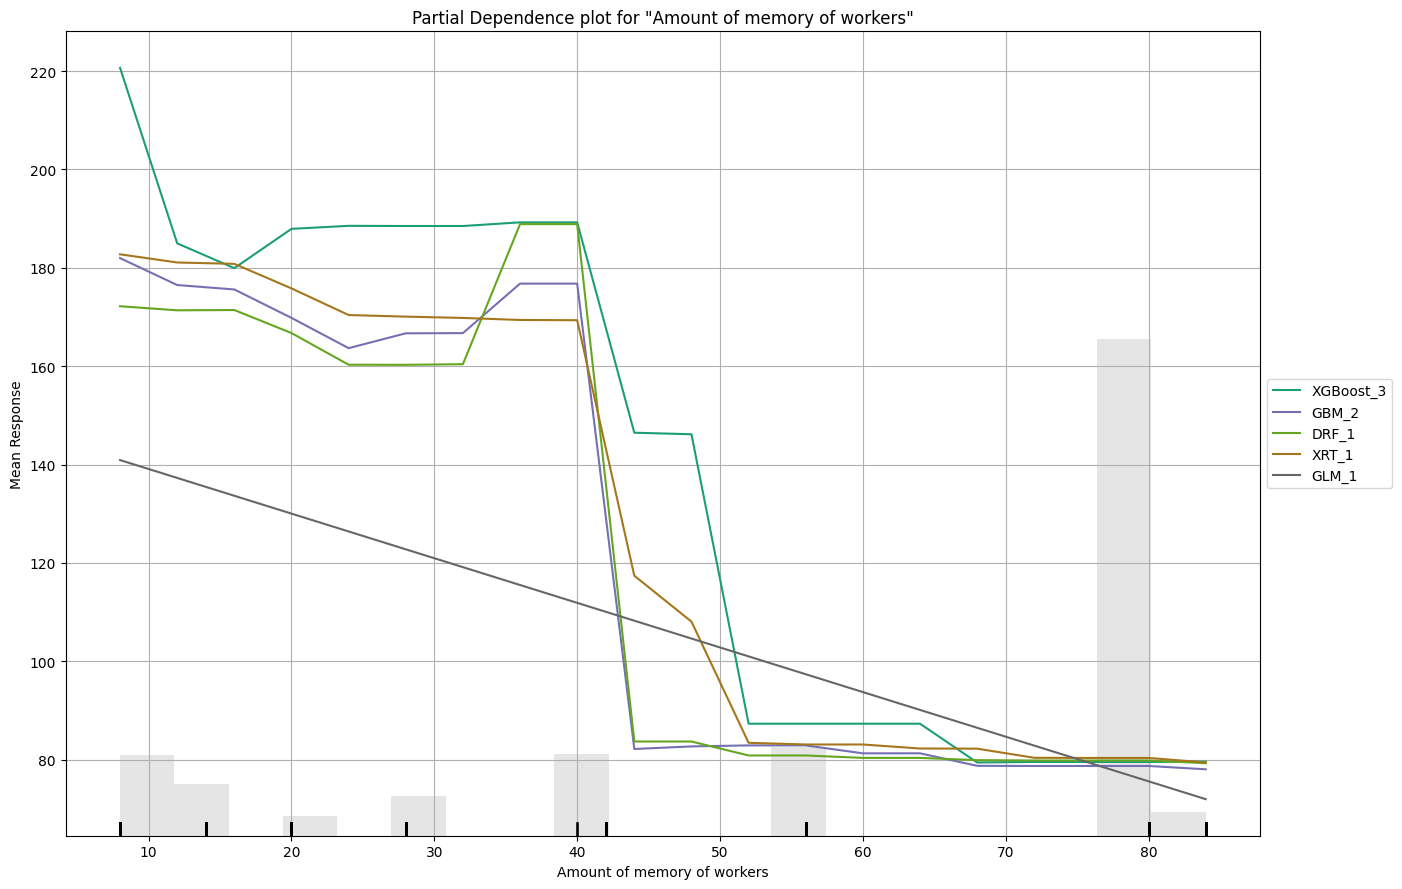

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

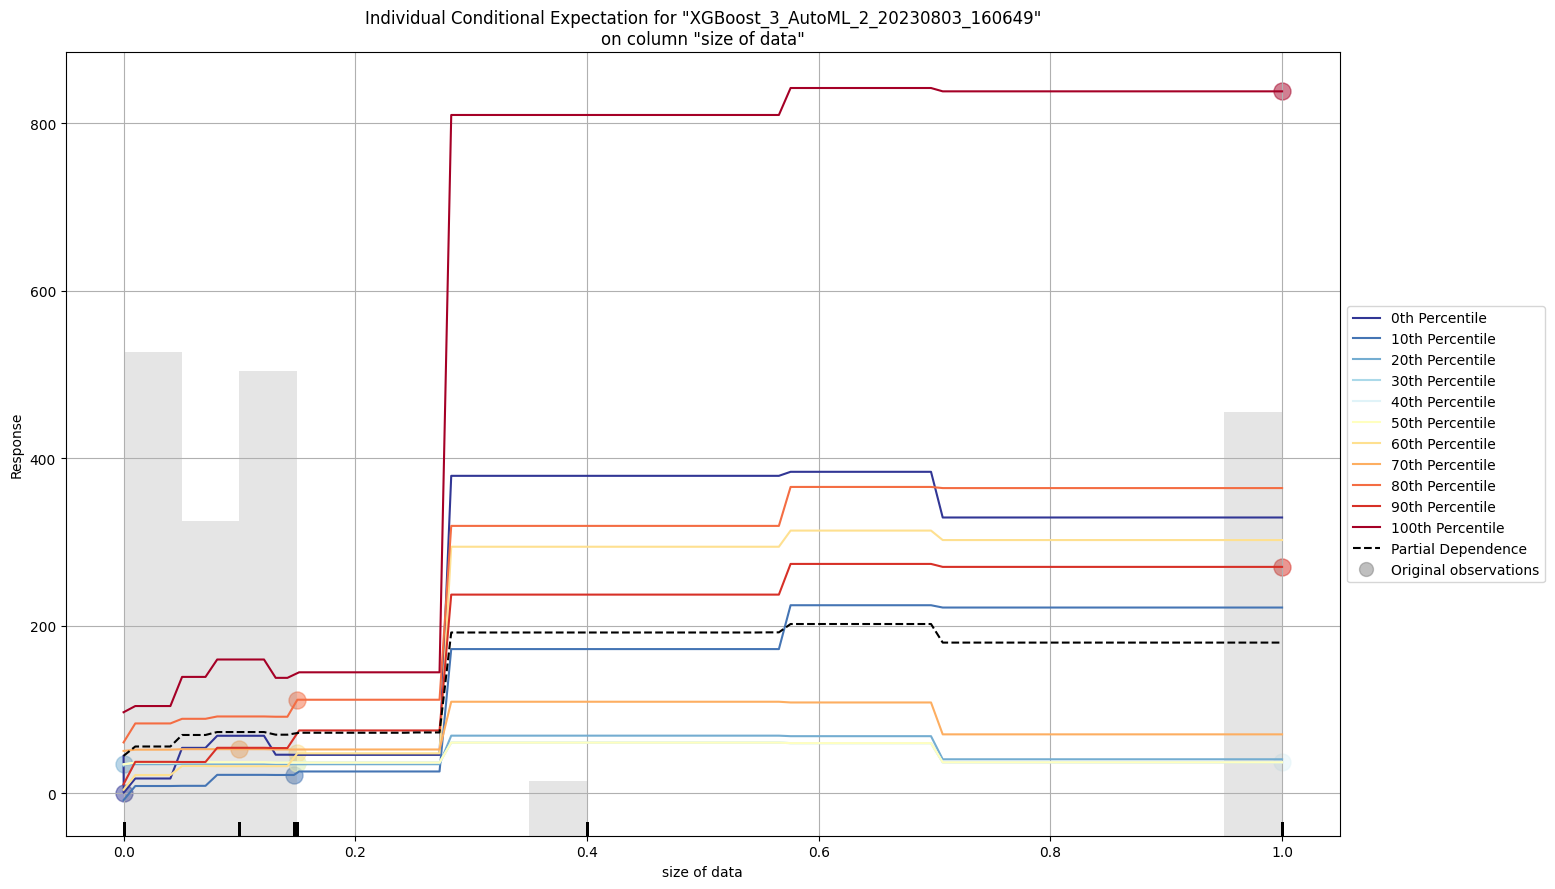

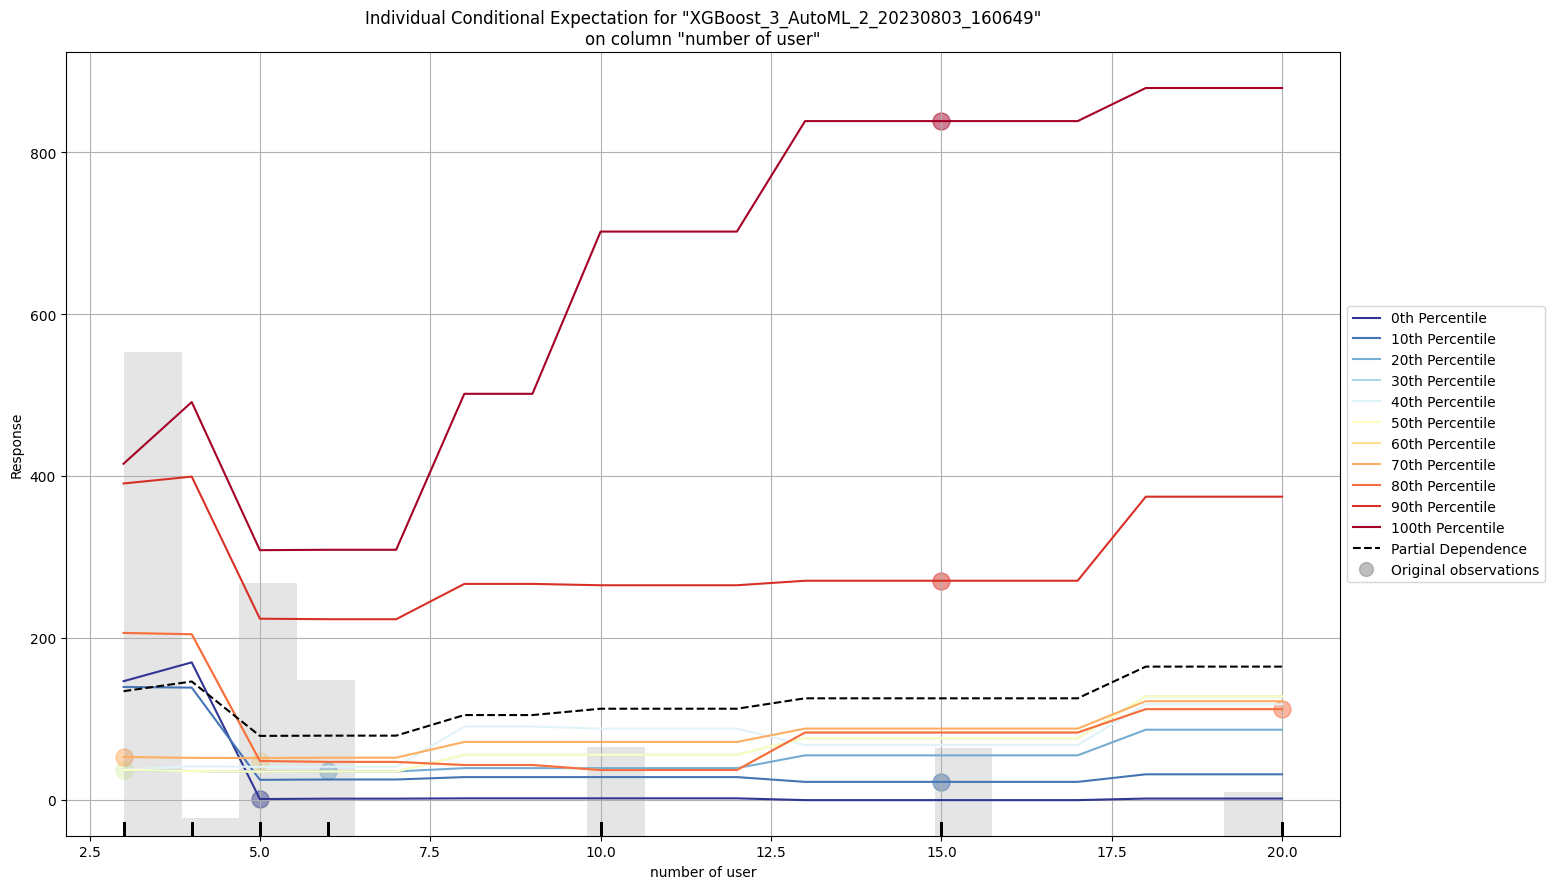

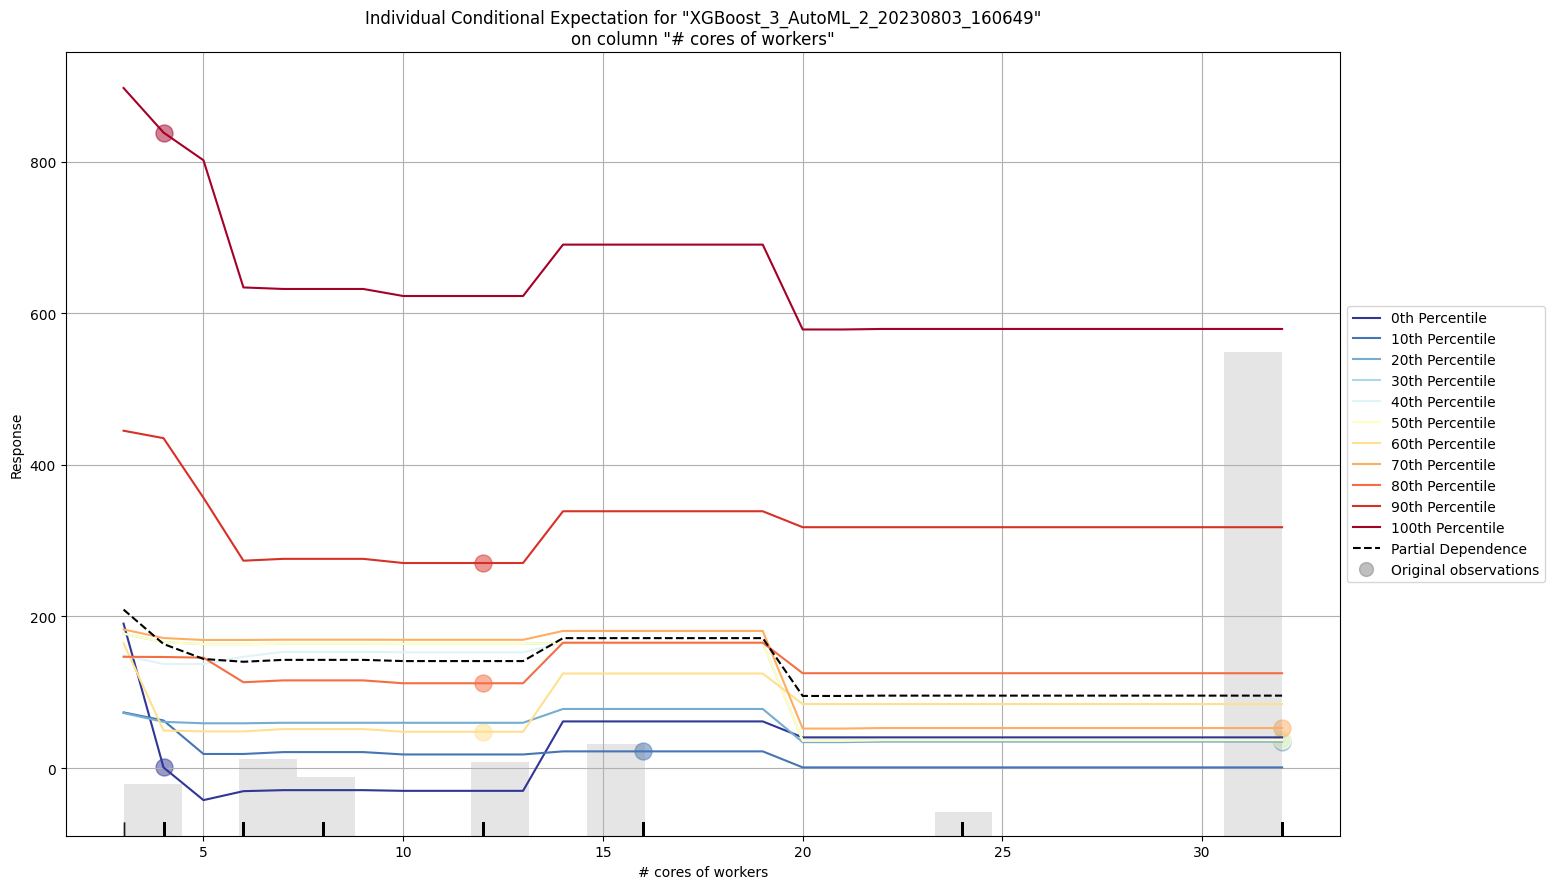

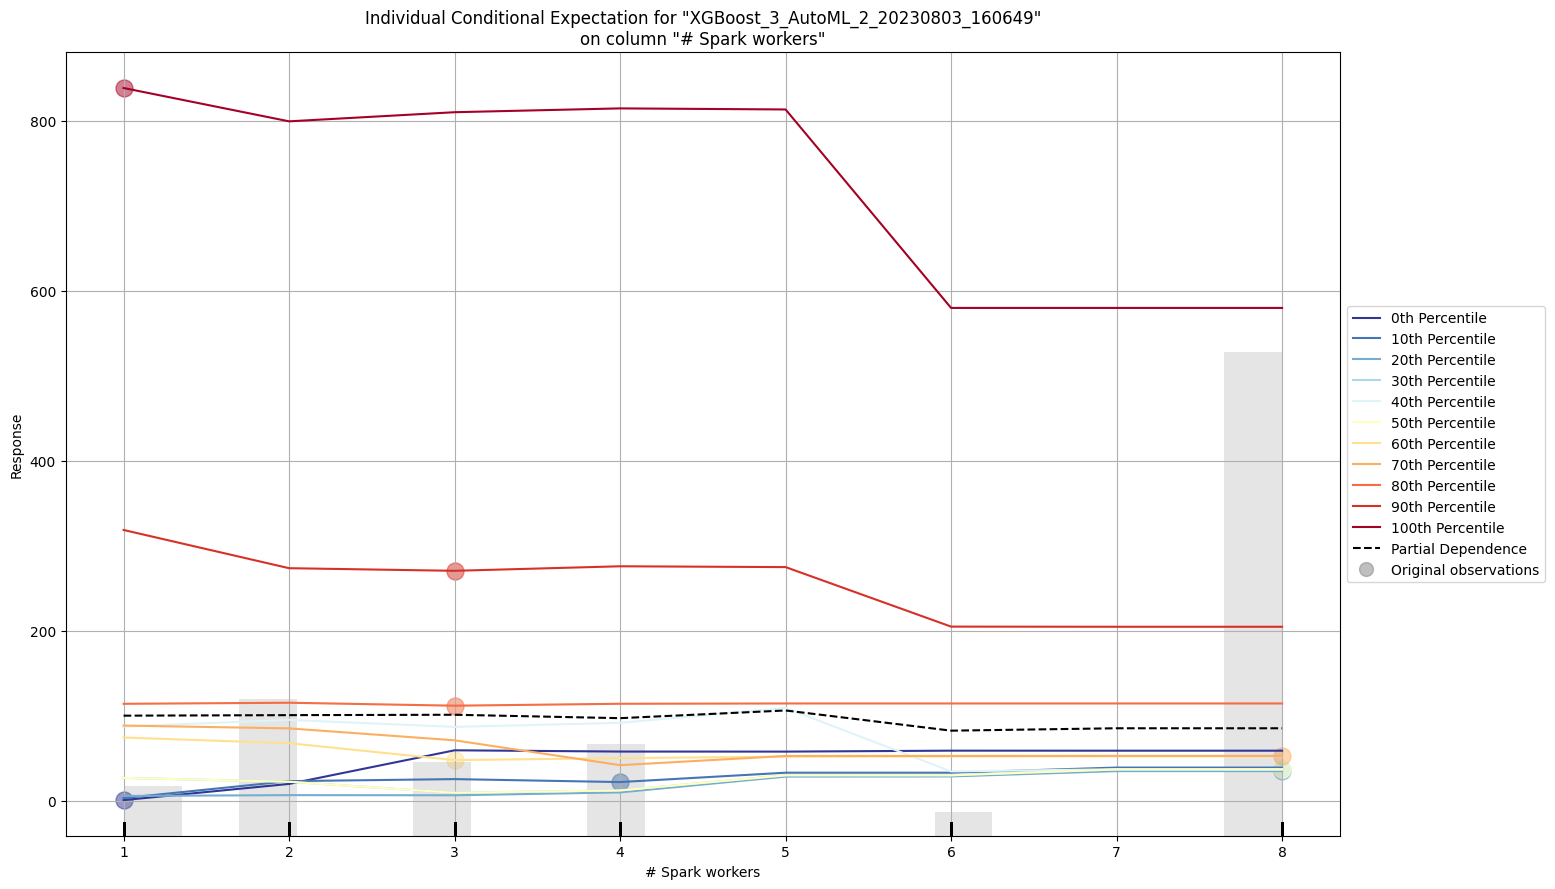

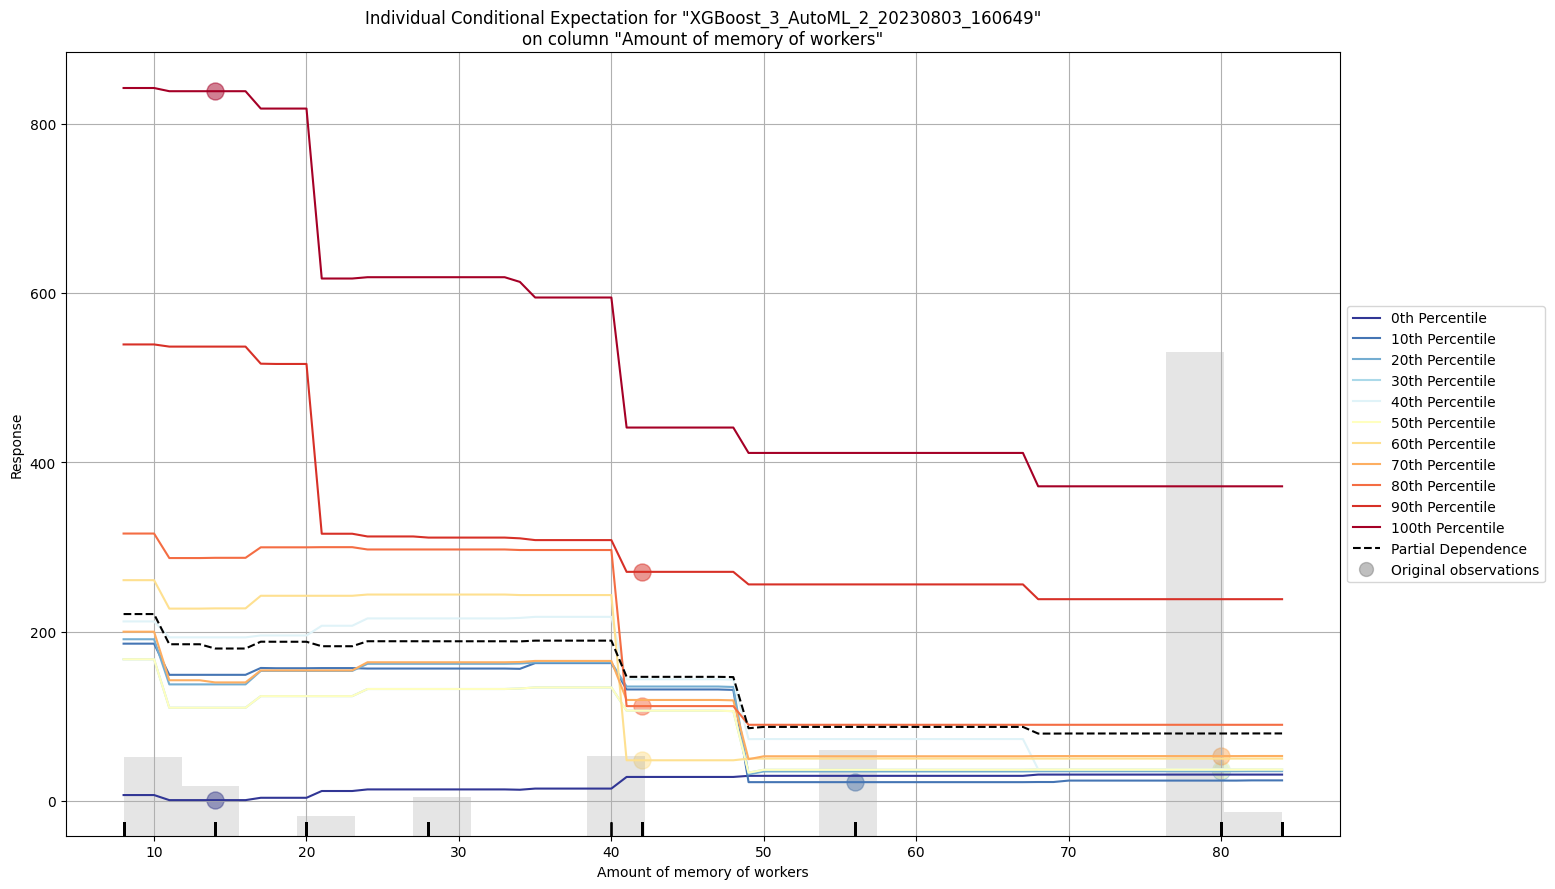

In [ ]:
exa = am1.explain(train)


# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

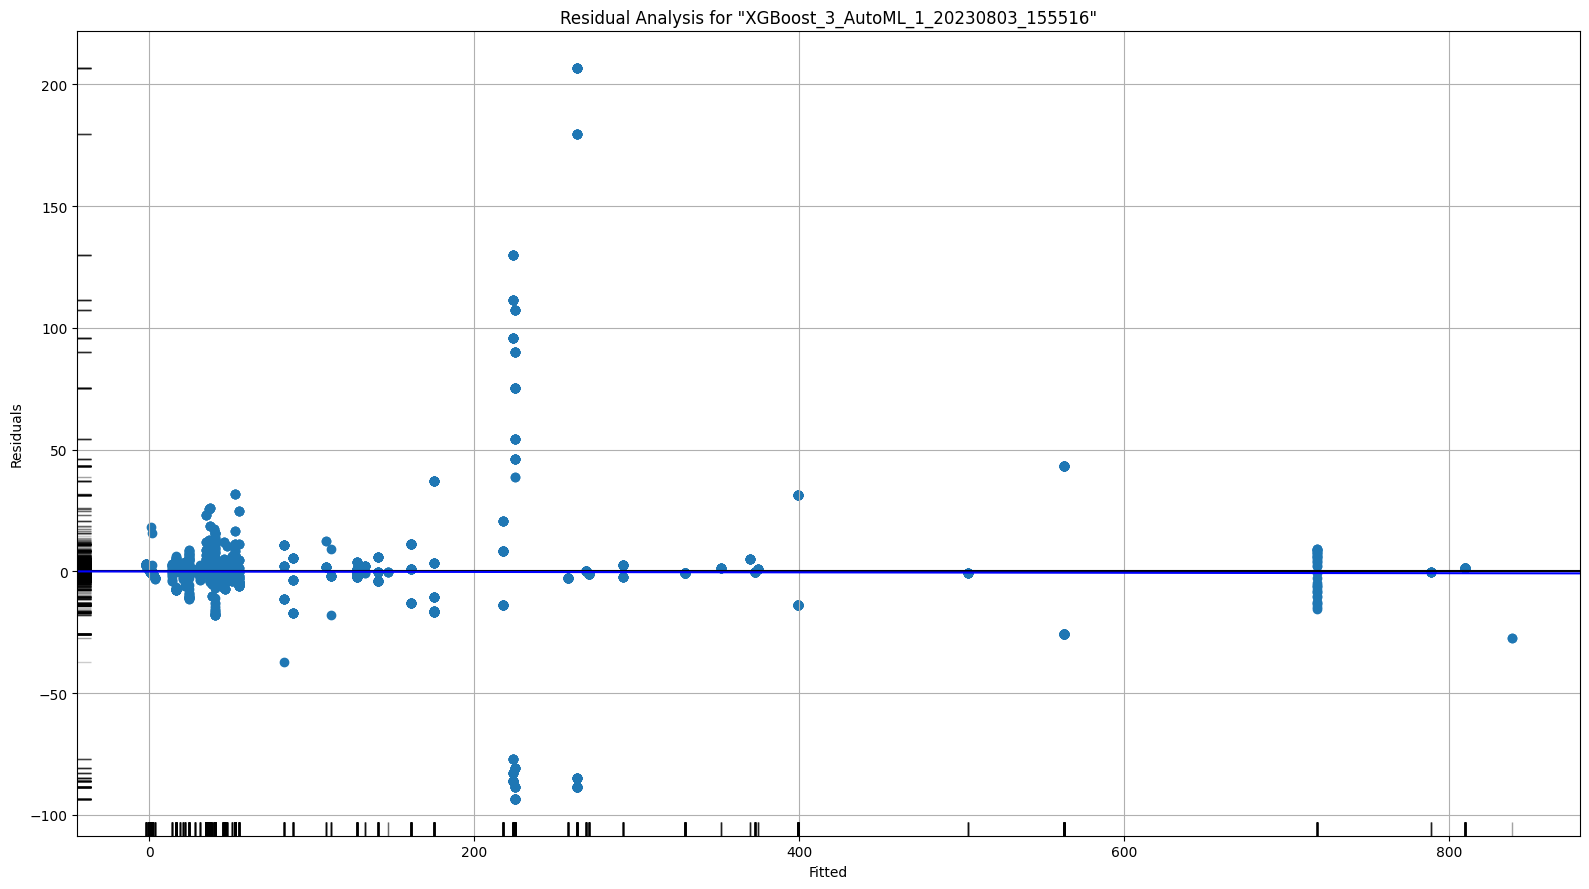

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

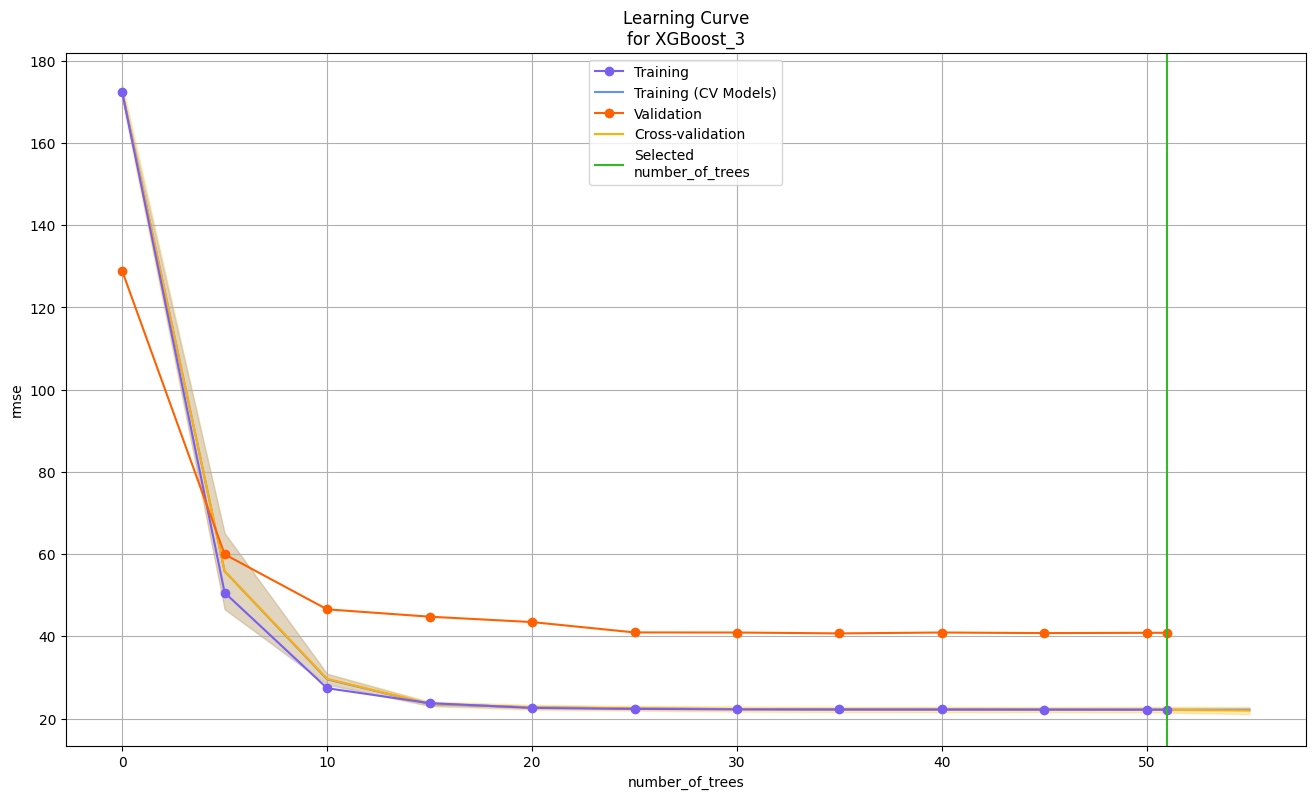

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

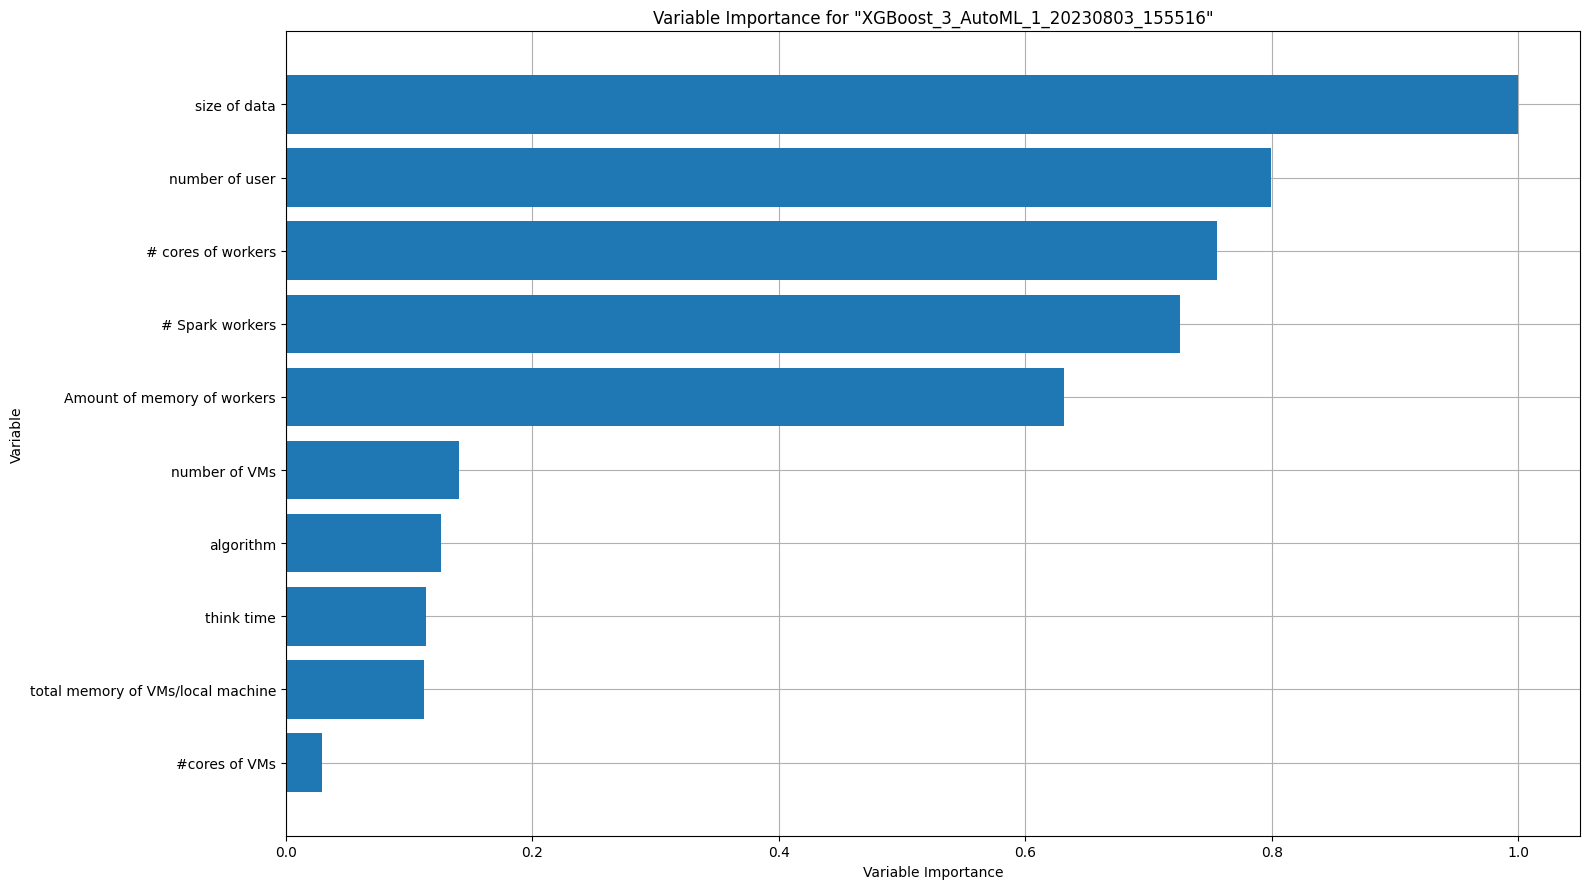

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

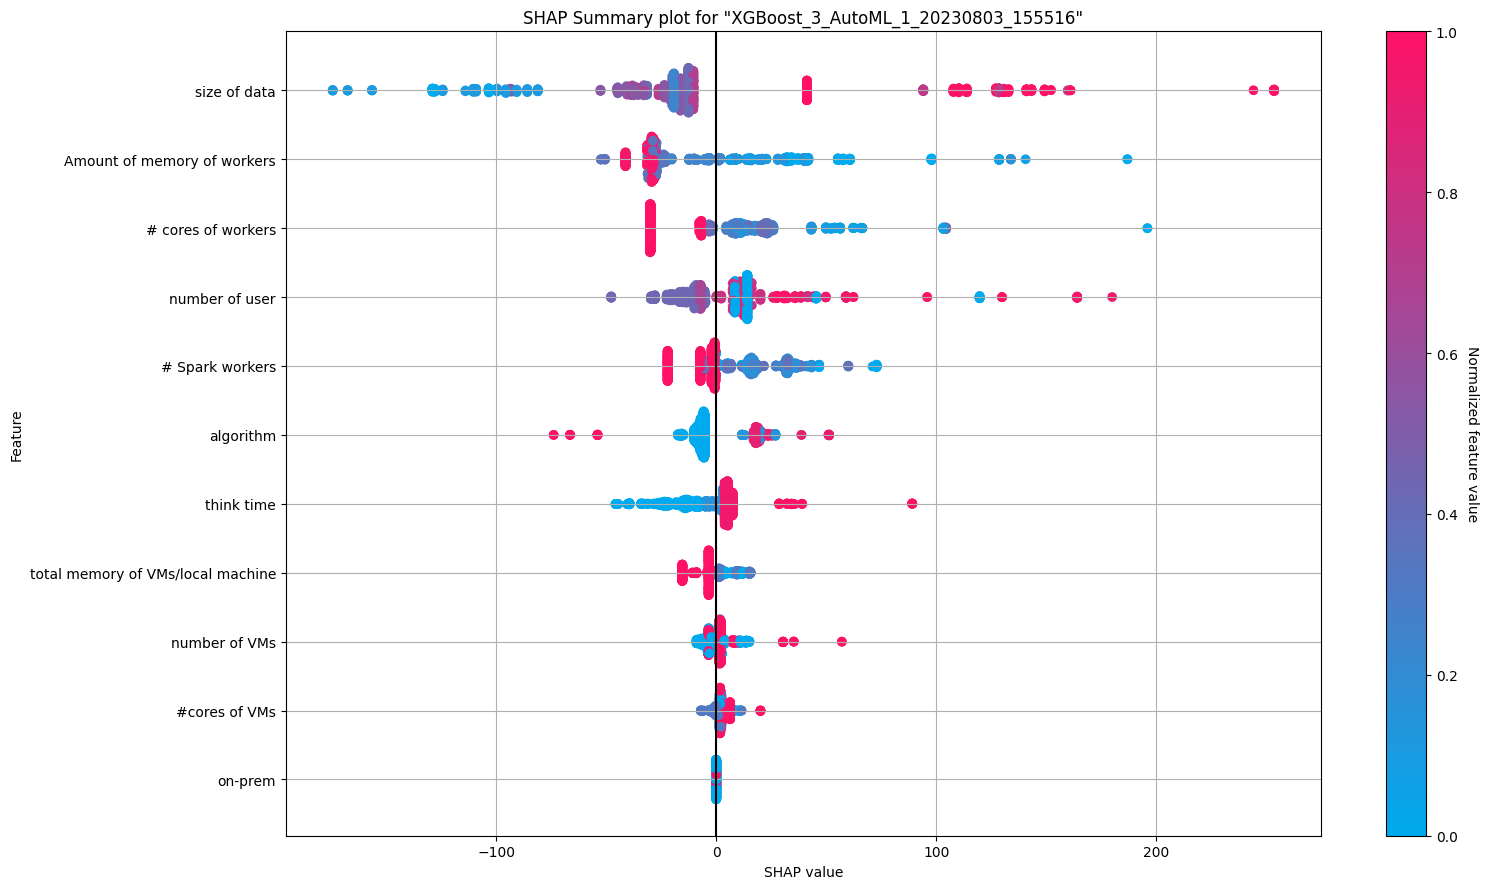

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

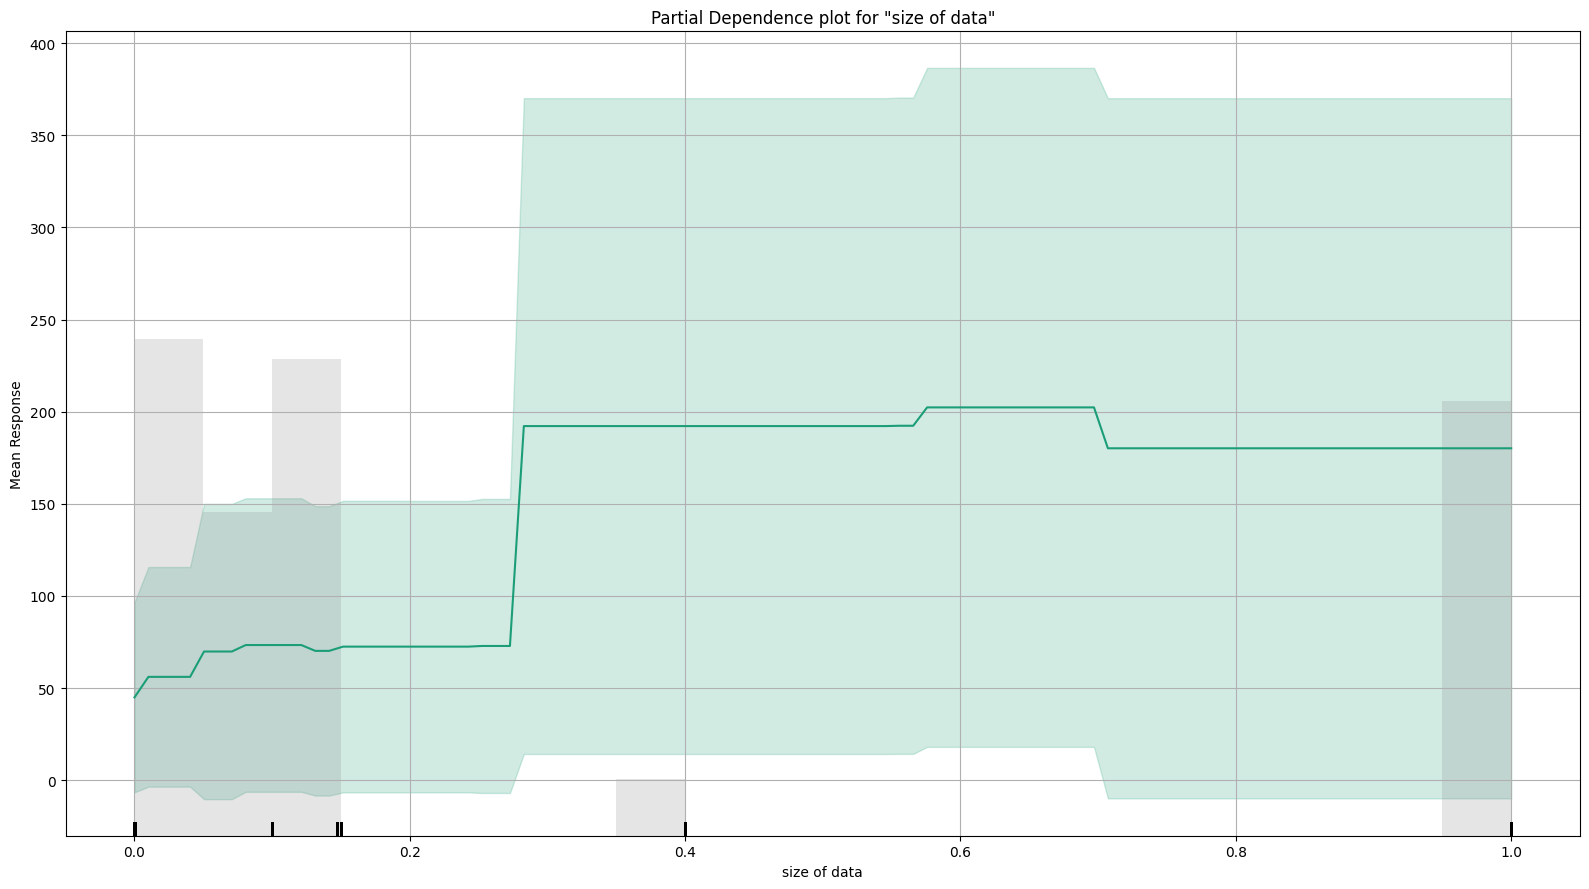

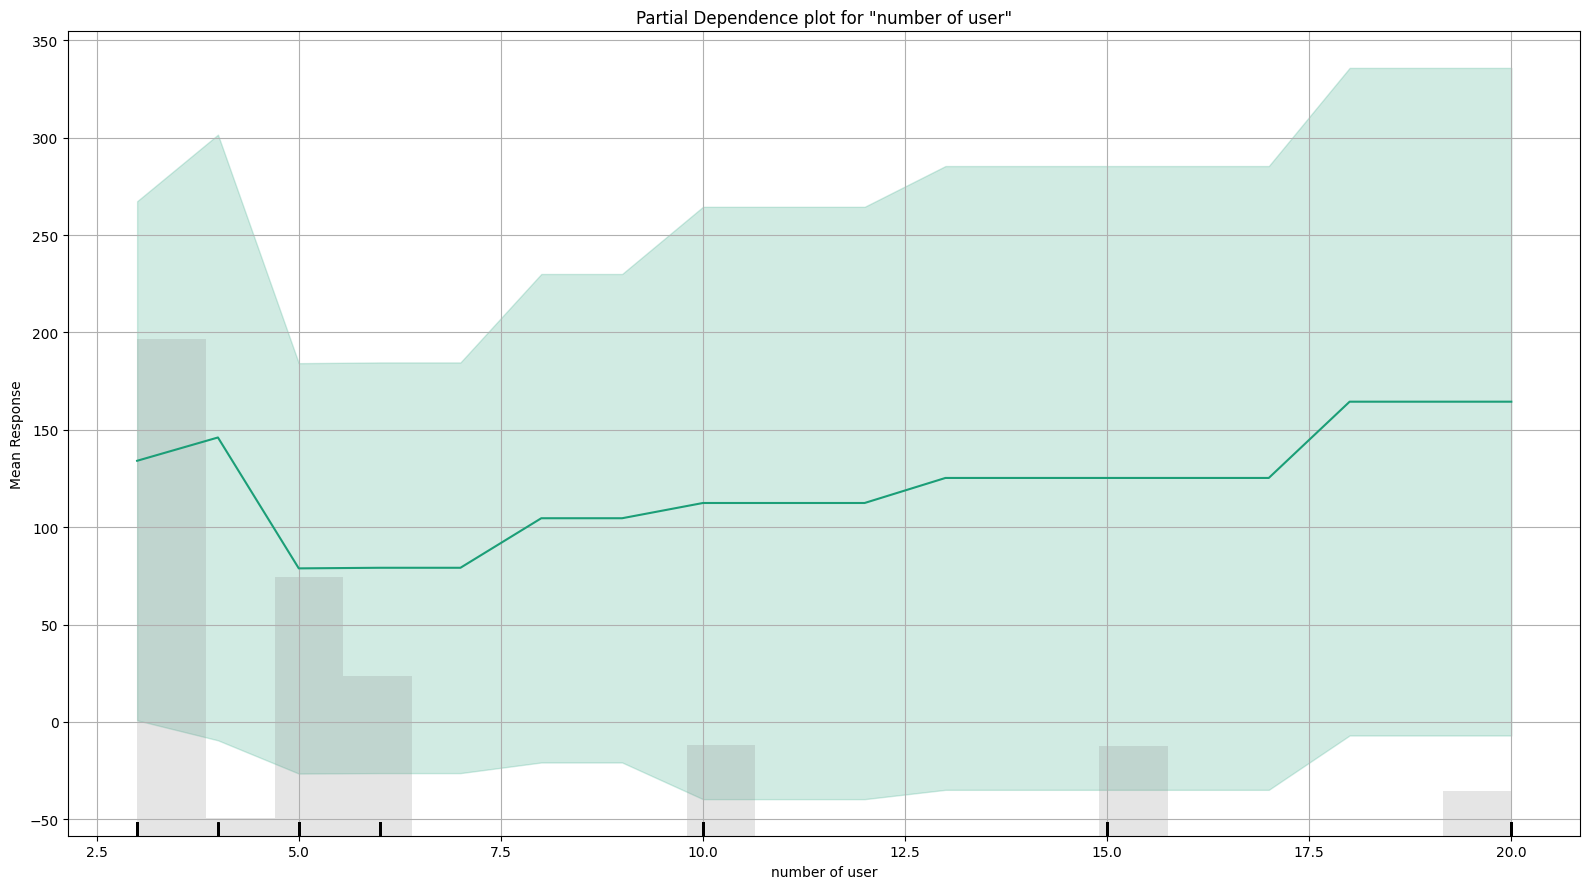

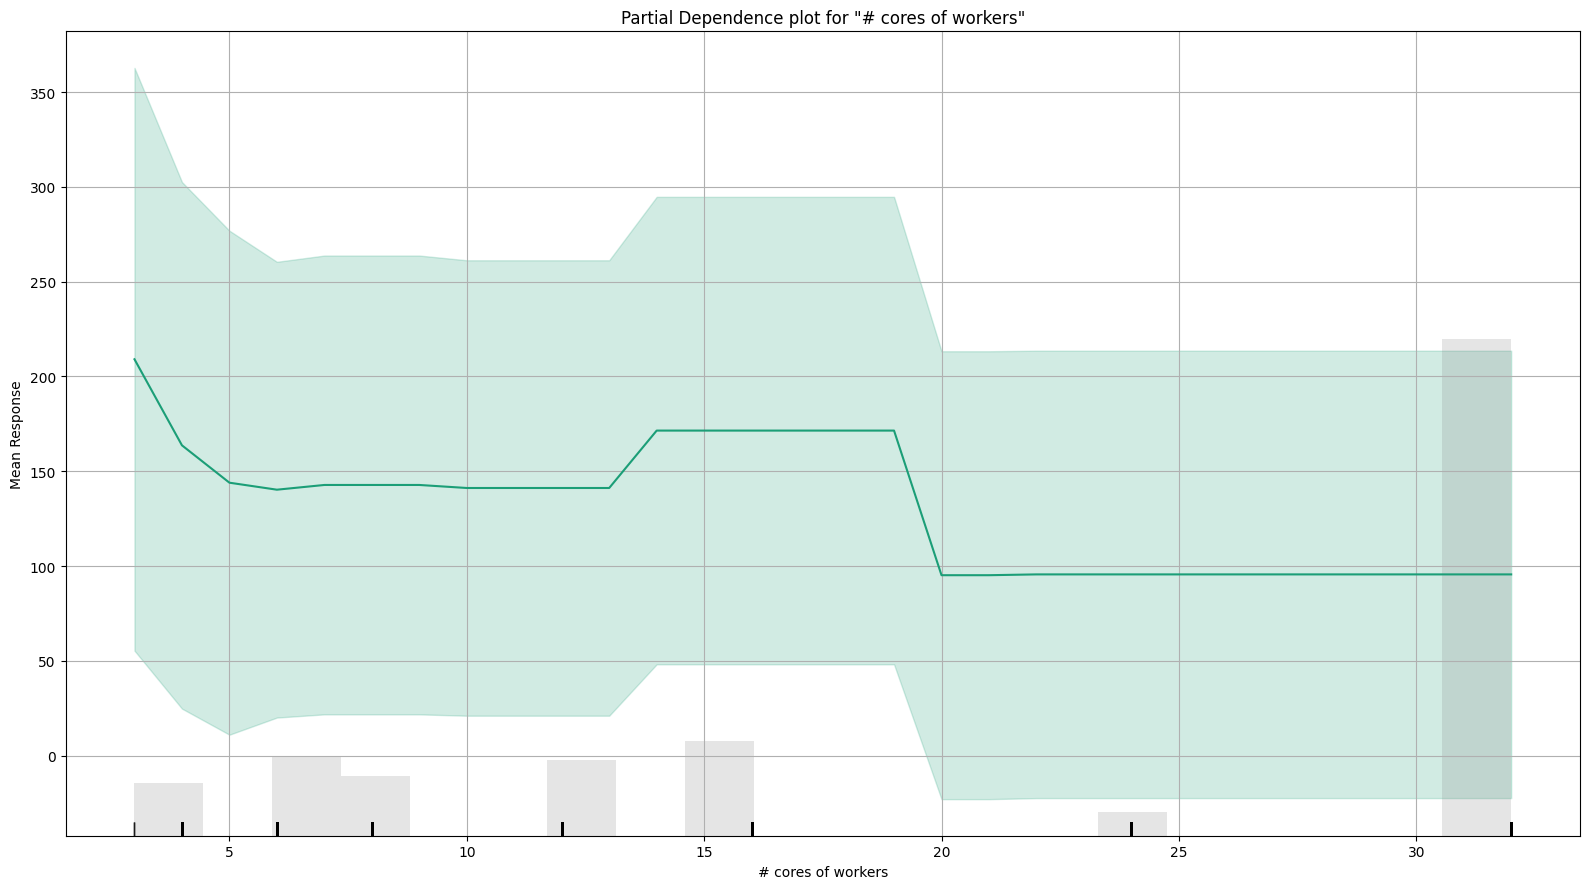

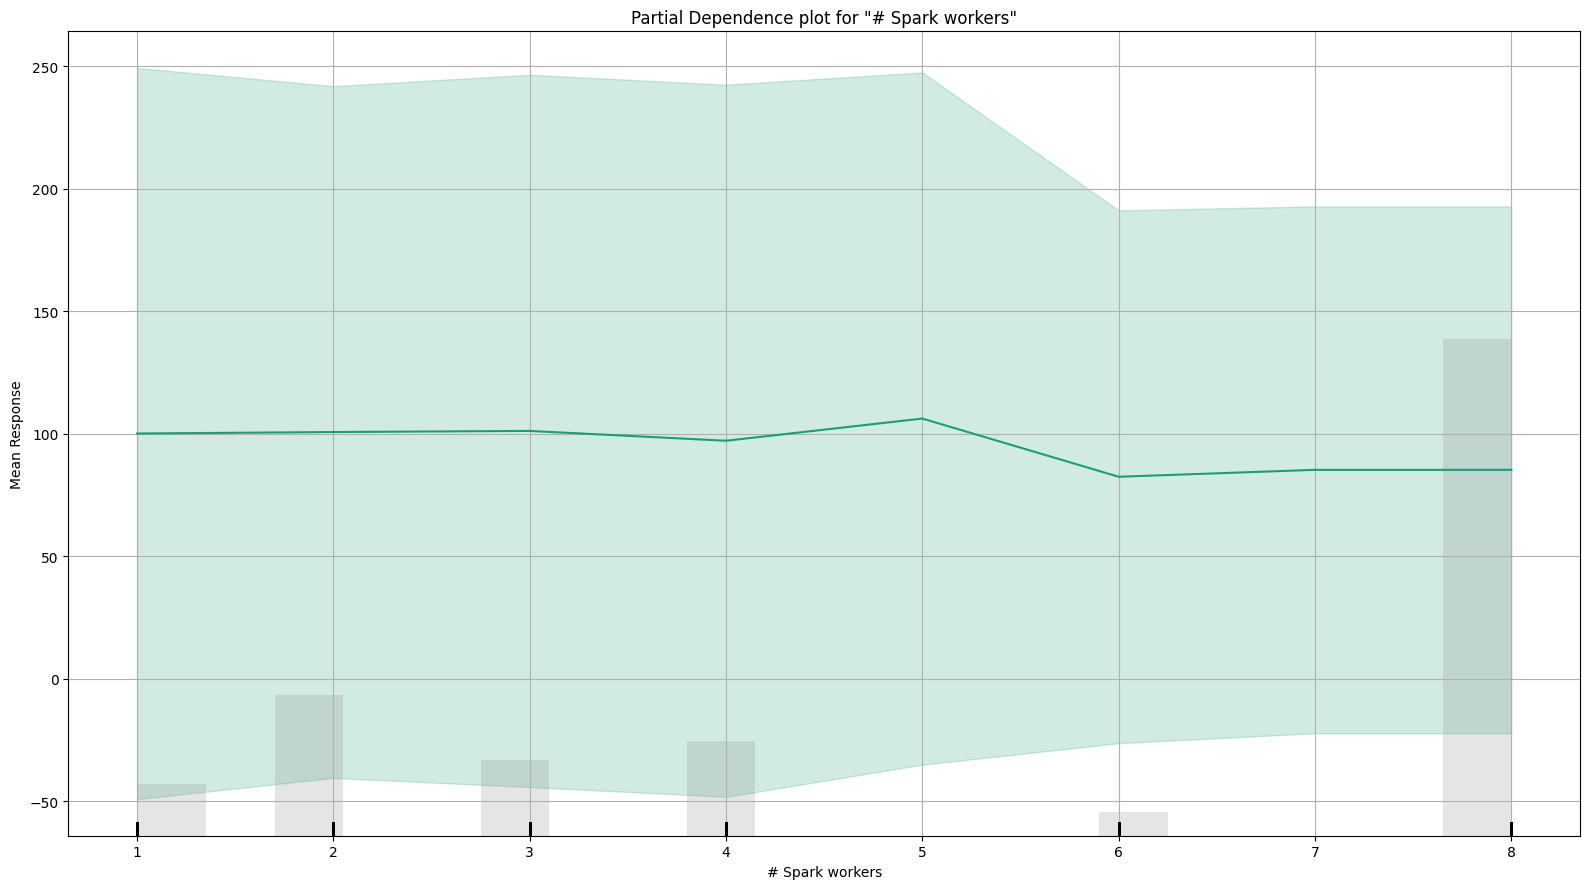

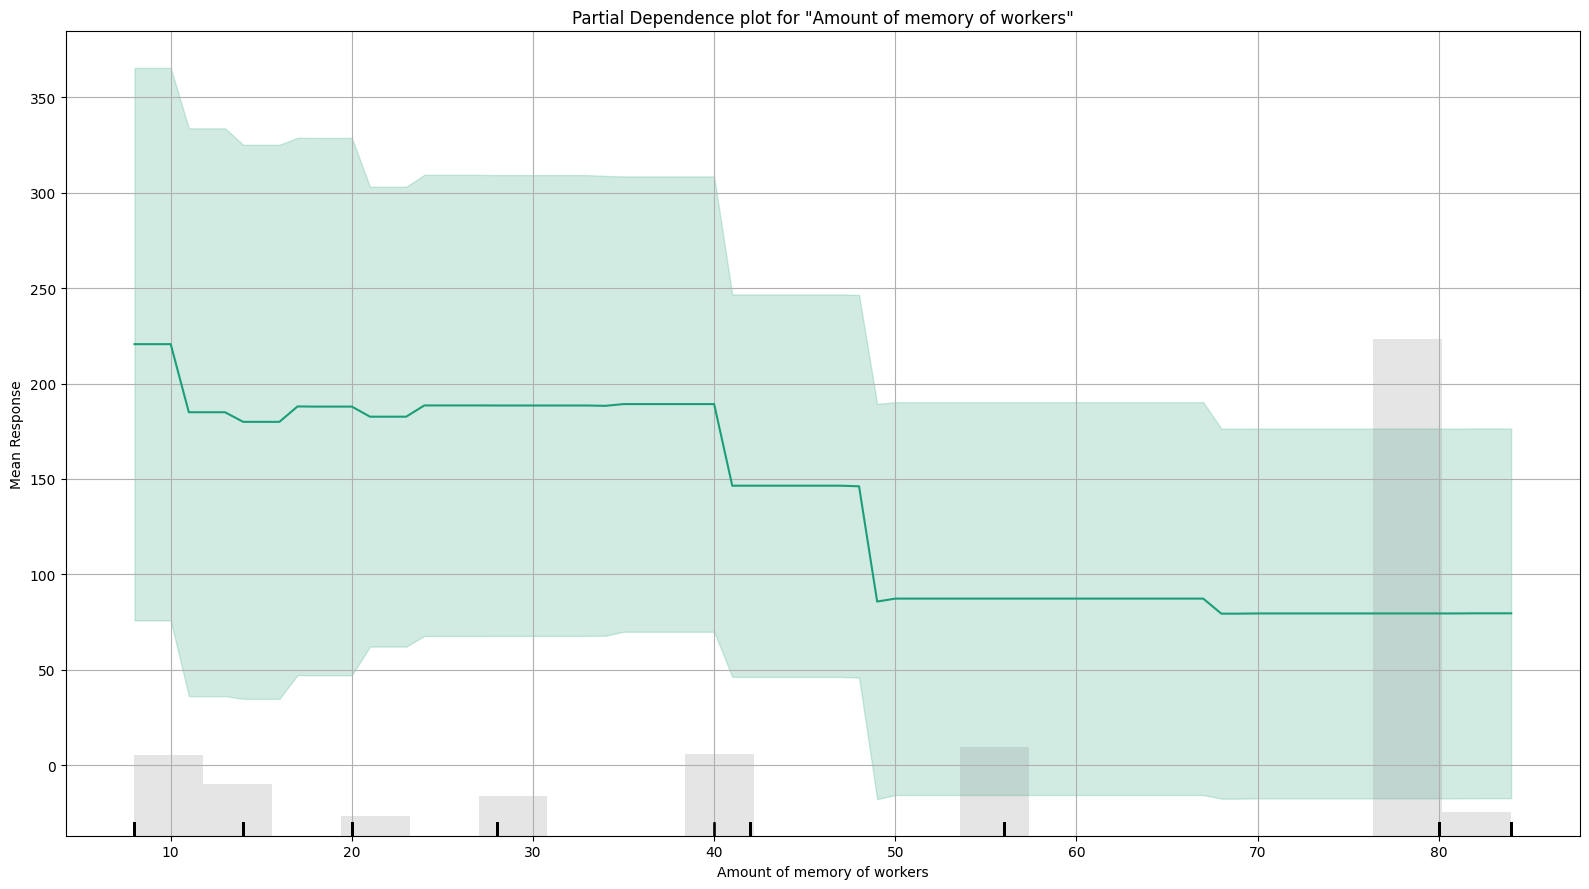

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

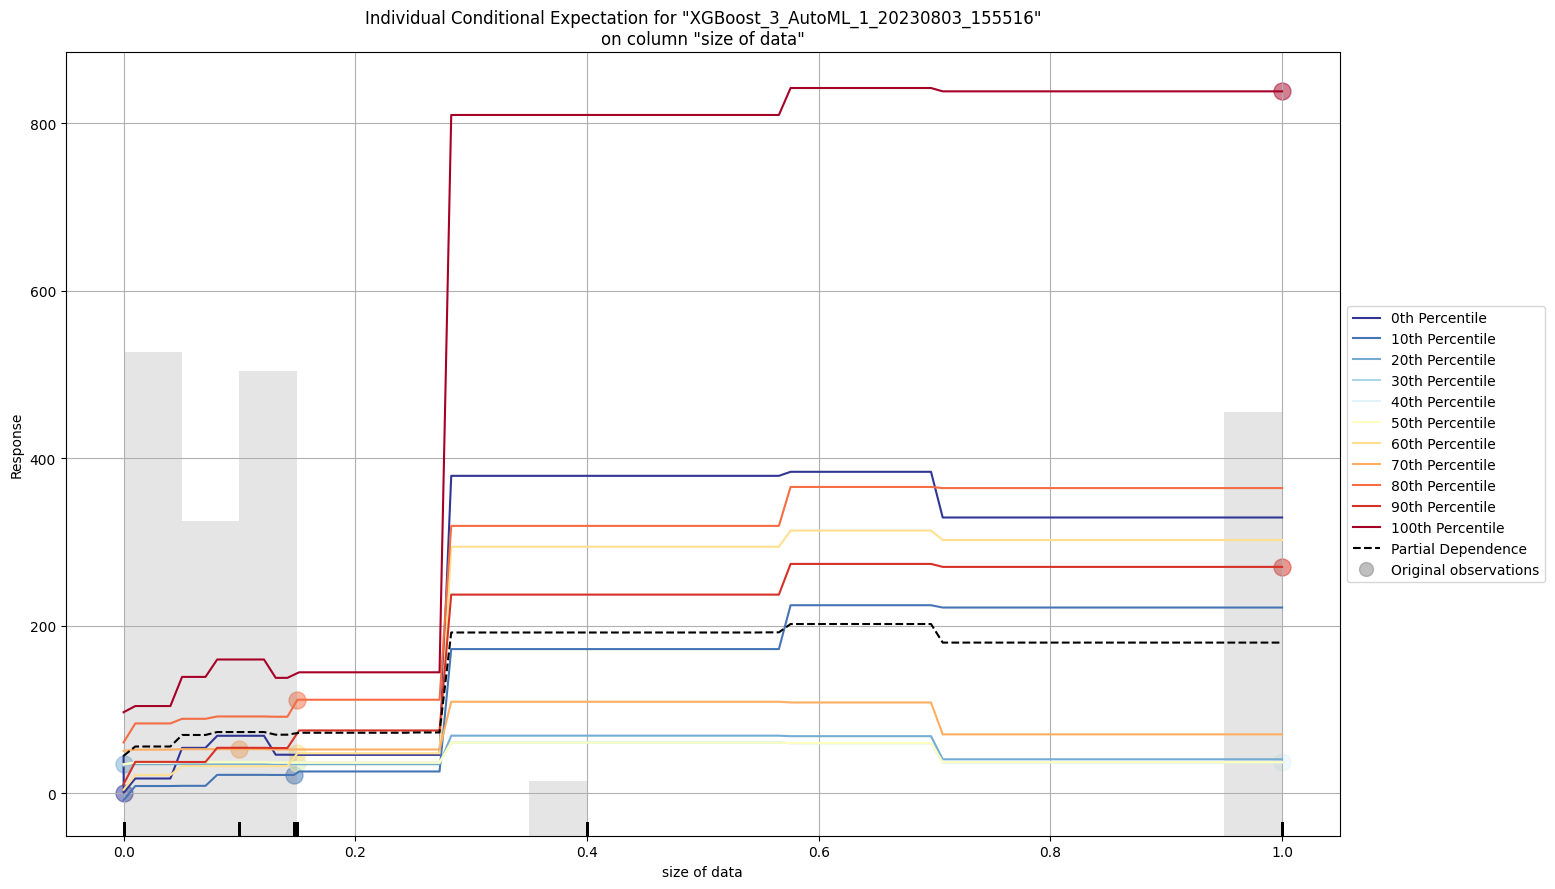

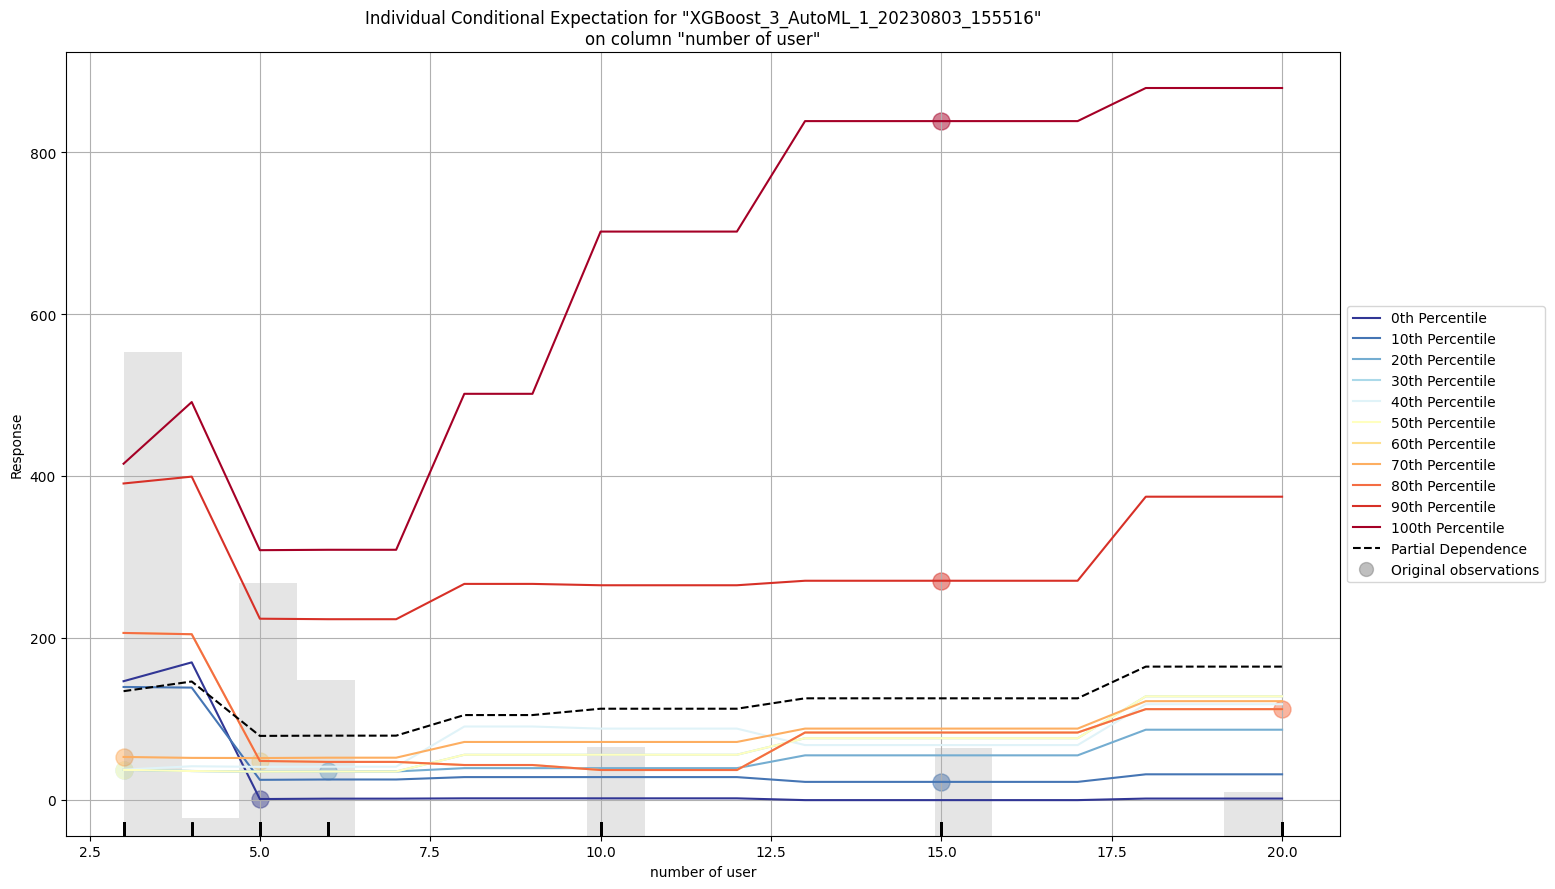

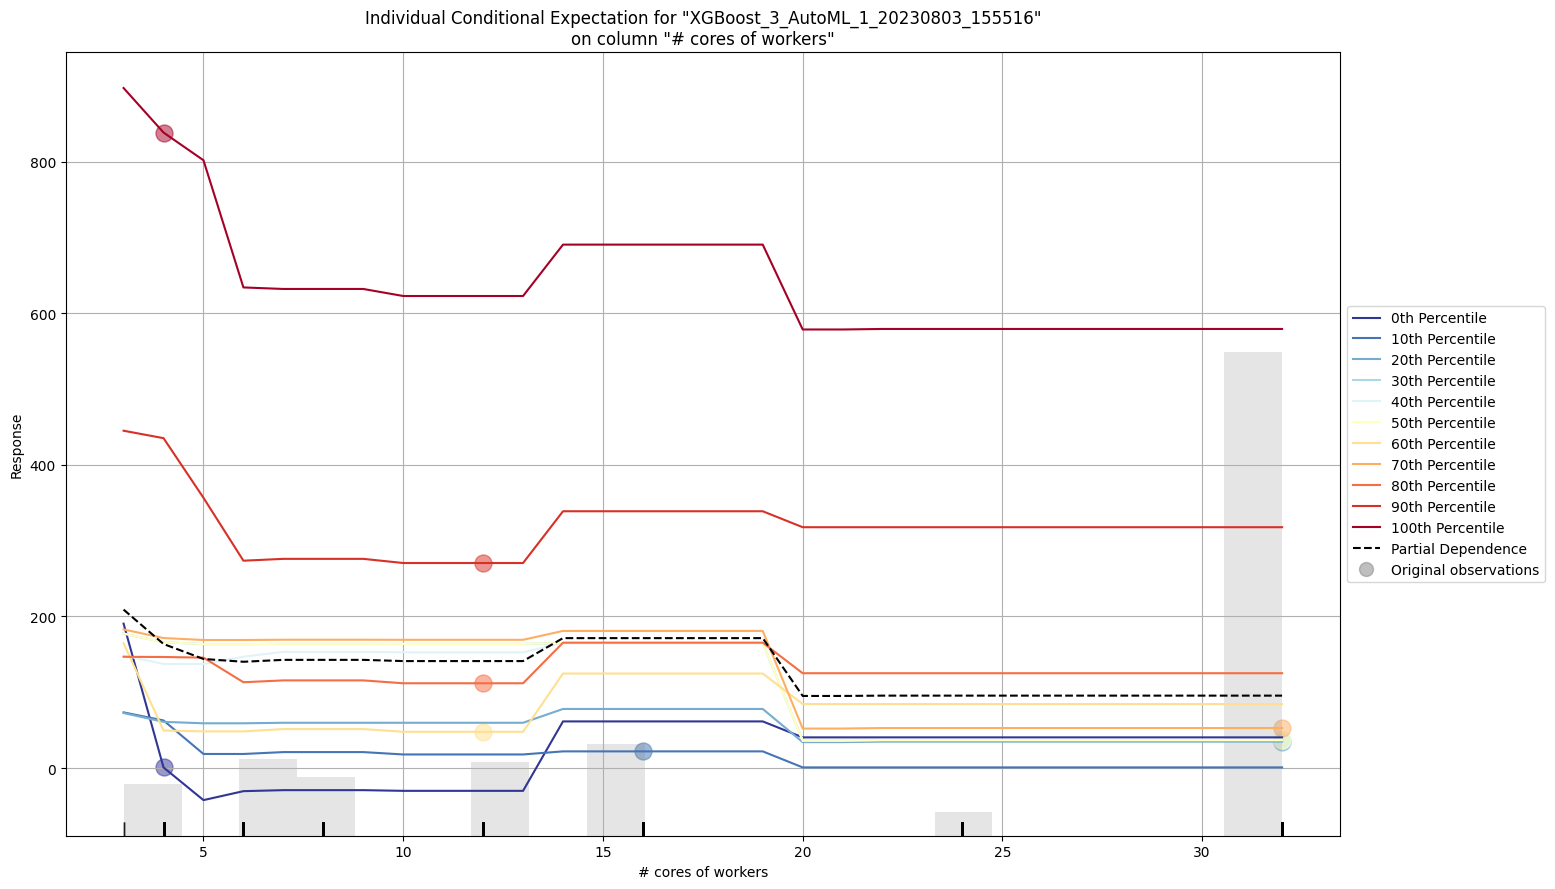

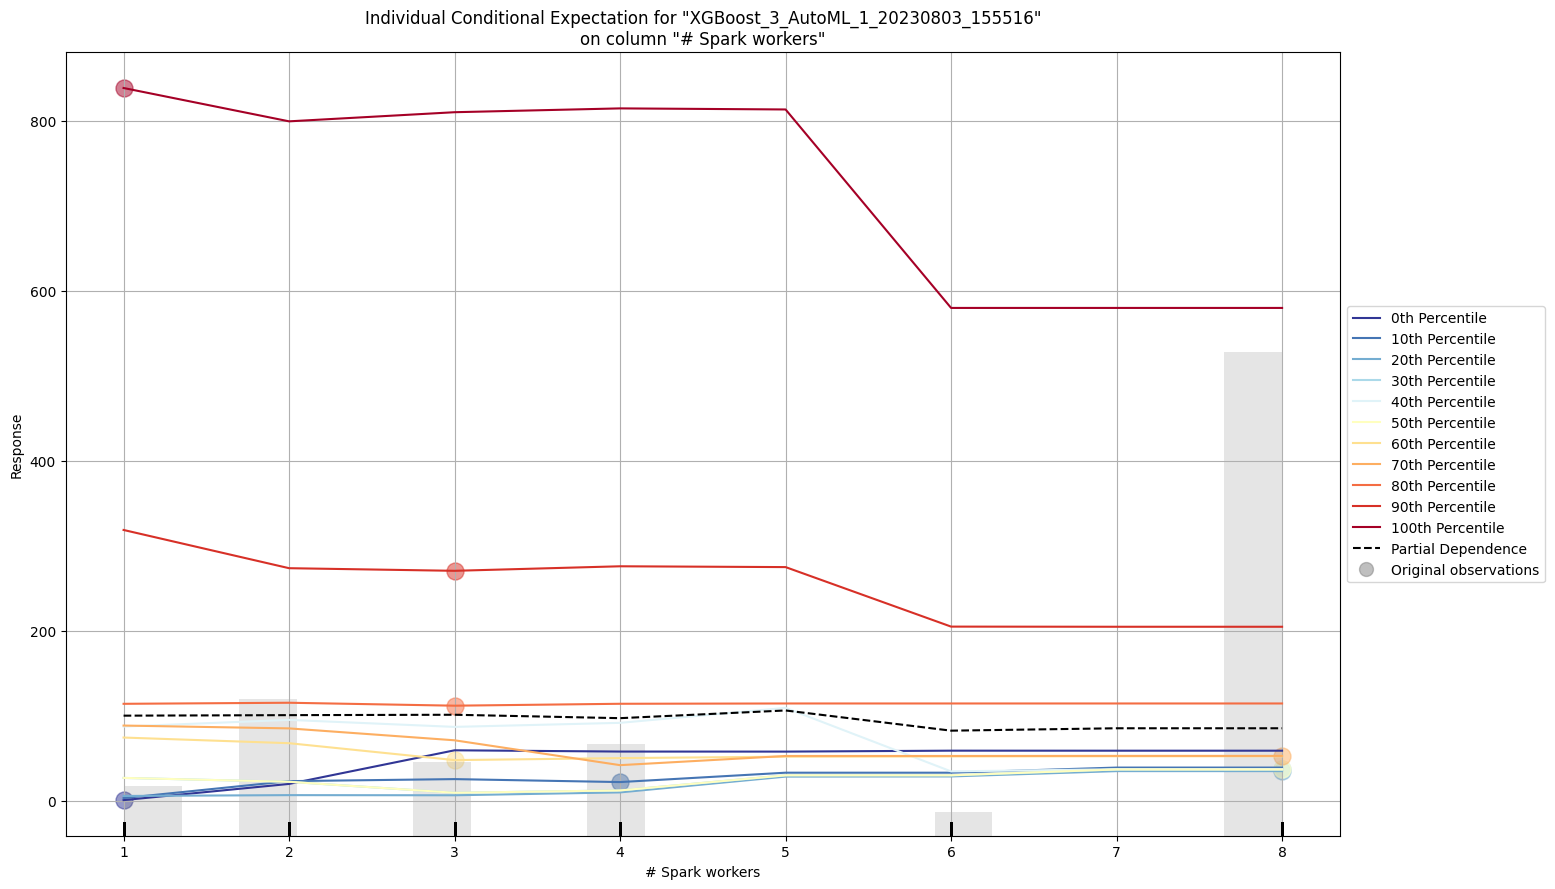

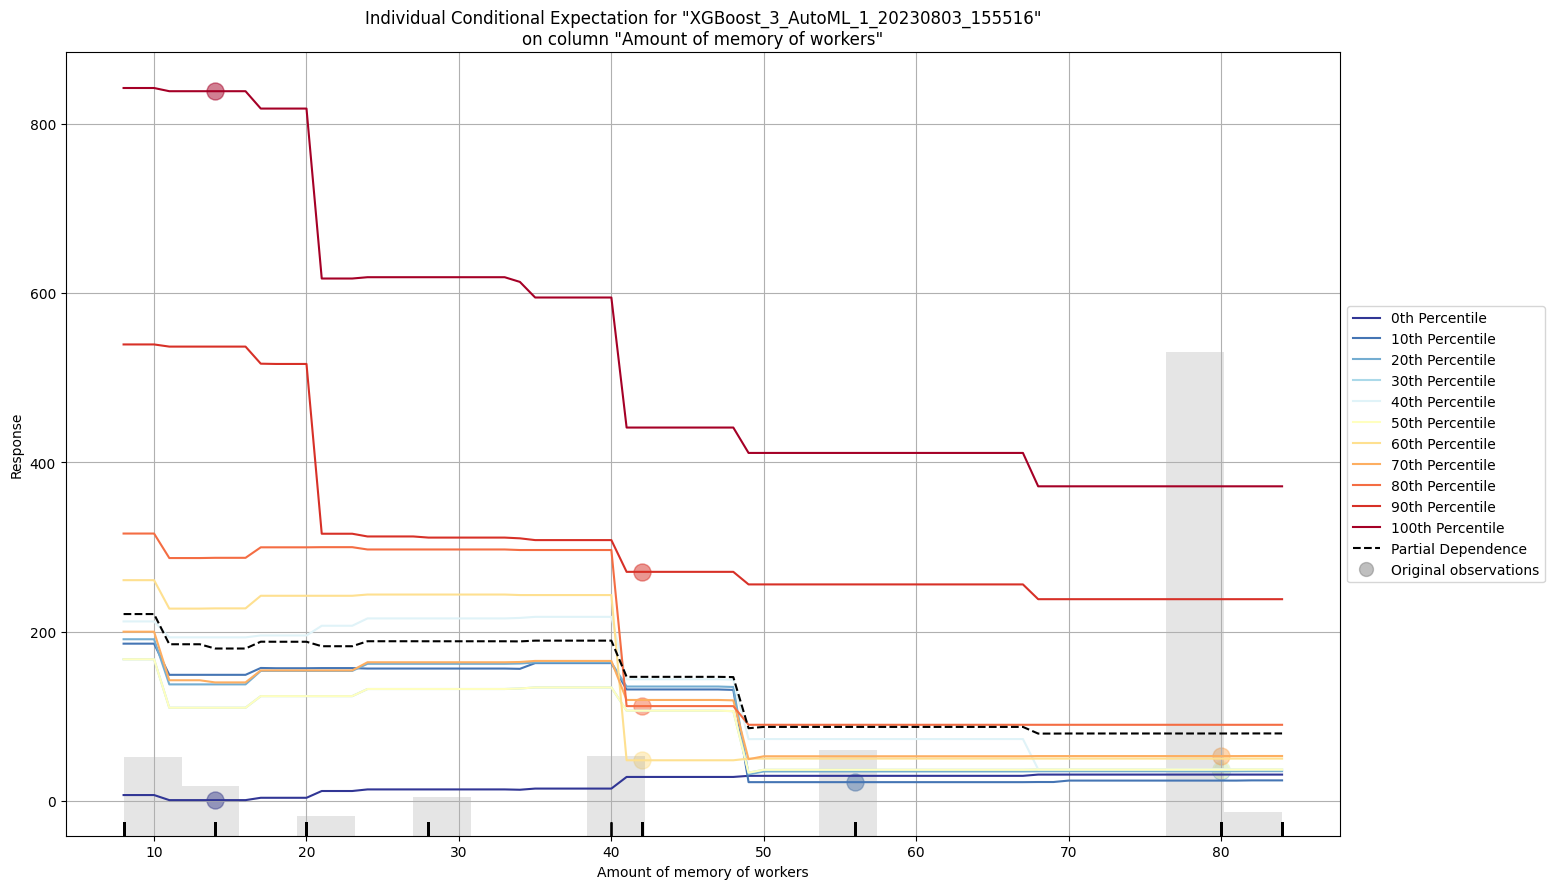

In [ ]:
exm = am1.leader.explain(train)

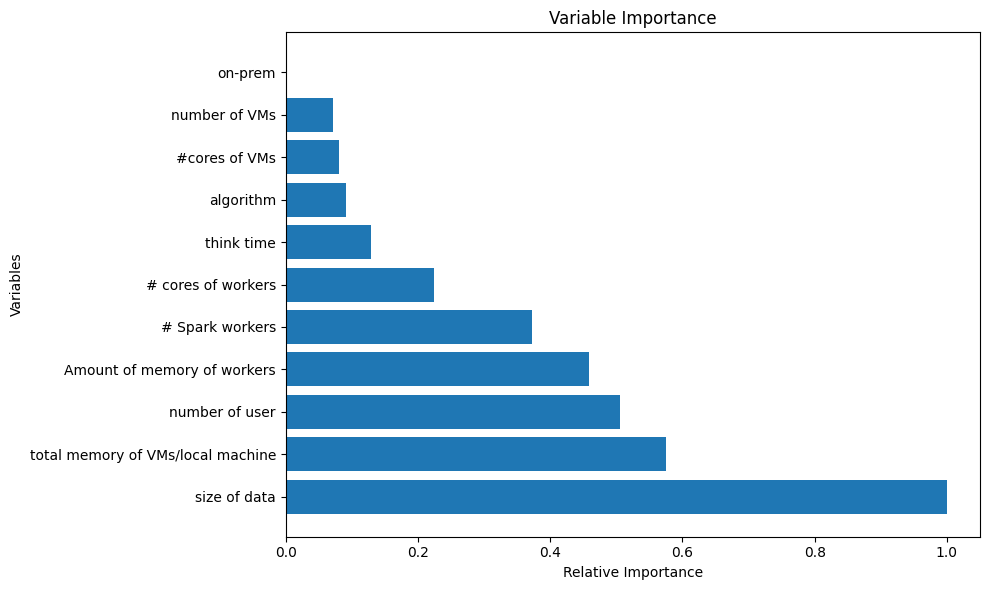

In [ ]:

import matplotlib.pyplot as plt

# Given data
variables = [
    'size of data',
    'total memory of VMs/local machine',
    'number of user',
    'Amount of memory of workers',
    '# Spark workers',
    '# cores of workers',
    'think time',
    'algorithm',
    '#cores of VMs',
    'number of VMs',
    'on-prem'
]

relative_importance = [
    1.0	,
    0.5752461,
    0.5056724,
    0.4584984,
    0.3718369,
    0.2247460,
    0.1297116,
    0.0915305,
    0.0806781,
    0.0708924,
    0.0008728
]

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.barh(variables, relative_importance)
plt.xlabel('Relative Importance')
plt.ylabel('Variables')
plt.title('Variable Importance')
plt.tight_layout()

plt.savefig('a.pdf')





plt.show()







In [ ]:
varimp

,variable,relative_importance,scaled_importance,percentage
0,size of data,1.016973e+09,1.000000,0.395785
1,Amount of memory of workers,3.723060e+08,0.366093,0.144894
2,total memory of VMs/local machine,2.585501e+08,0.254235,0.100622
3,# Spark workers,2.243895e+08,0.220645,0.087328
4,number of user,2.112921e+08,0.207766,0.082231
5,# cores of workers,1.972803e+08,0.193988,0.076777
6,#cores of VMs,9.307850e+07,0.091525,0.036224
7,algorithm,7.911926e+07,0.077799,0.030792
8,think time,6.167553e+07,0.060646,0.024003
9,number of VMs,4.105088e+07,0.040366,0.015976


In [ ]:
am1.leader.download_mojo(path = "./")

'/content/GBM_5_AutoML_1_20230729_190345.zip'

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.show()

In [ ]:
plt.savefig('variable_importance_plot.pdf')
plt.show()

<Figure size 640x480 with 0 Axes>

In [ ]:
out = h2o.get_model([mid for mid in model_ids if "DRF" in mid][0])

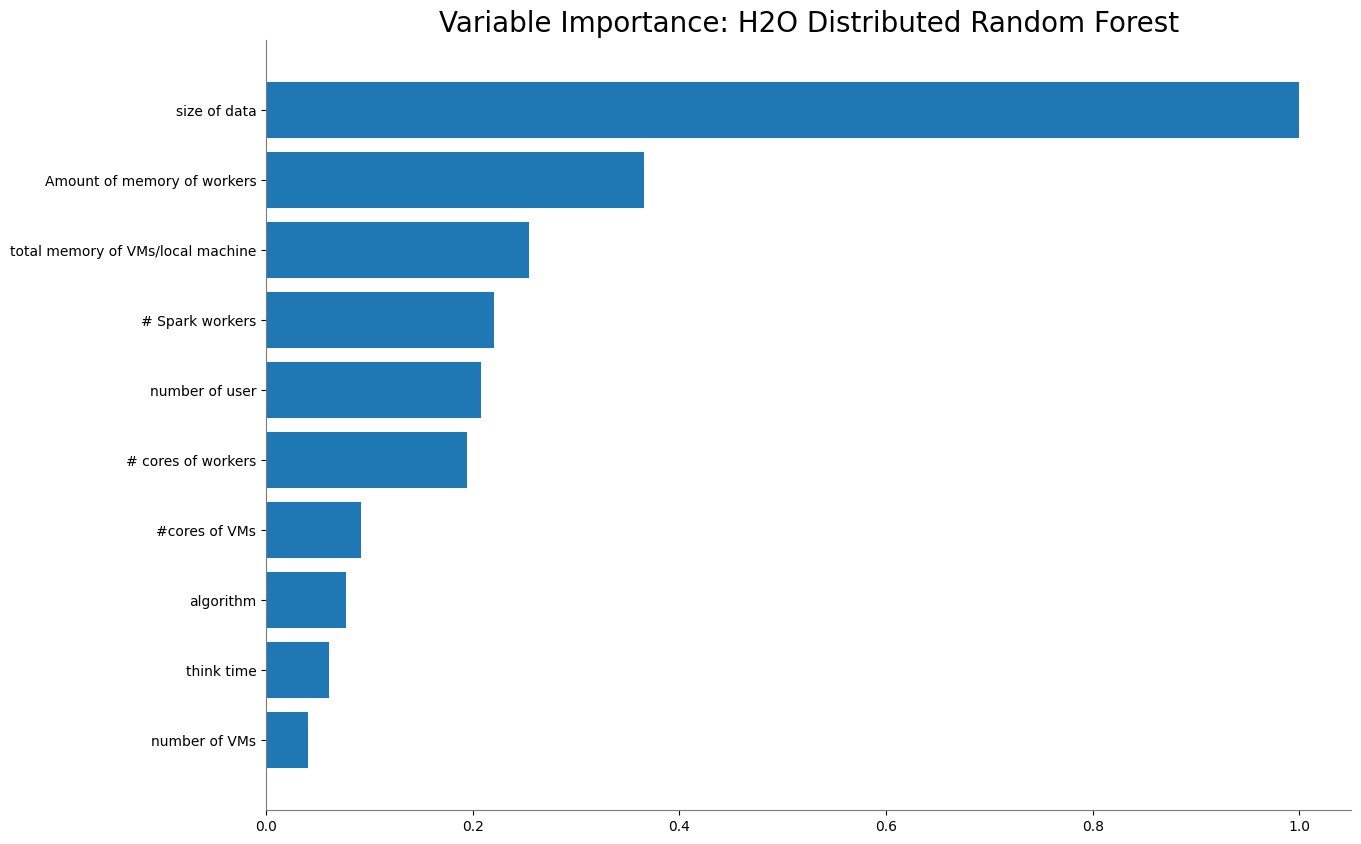

<Figure size 640x480 with 0 Axes>

In [ ]:
g=out.varimp_plot()

In [ ]:
!pip install dalex

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 18.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for dalex: filename=dalex-1.6.0-py3-none-any.whl size=1046000 sha256=1bb37a8f5a05deecc077ca1f33c28870ffd31f8d1ef7c901dcdb6c197002ab2b
  Stored in directory: /root/.cache/pip/wheels/c8/45/19/f5810bf7c5ff9a476ebd89bb5b81a18ffcdf93931d17dbb0c1
Successfully built dalex


In [ ]:
import dalex as dx